# Union Hill Enslaved Data Preparation

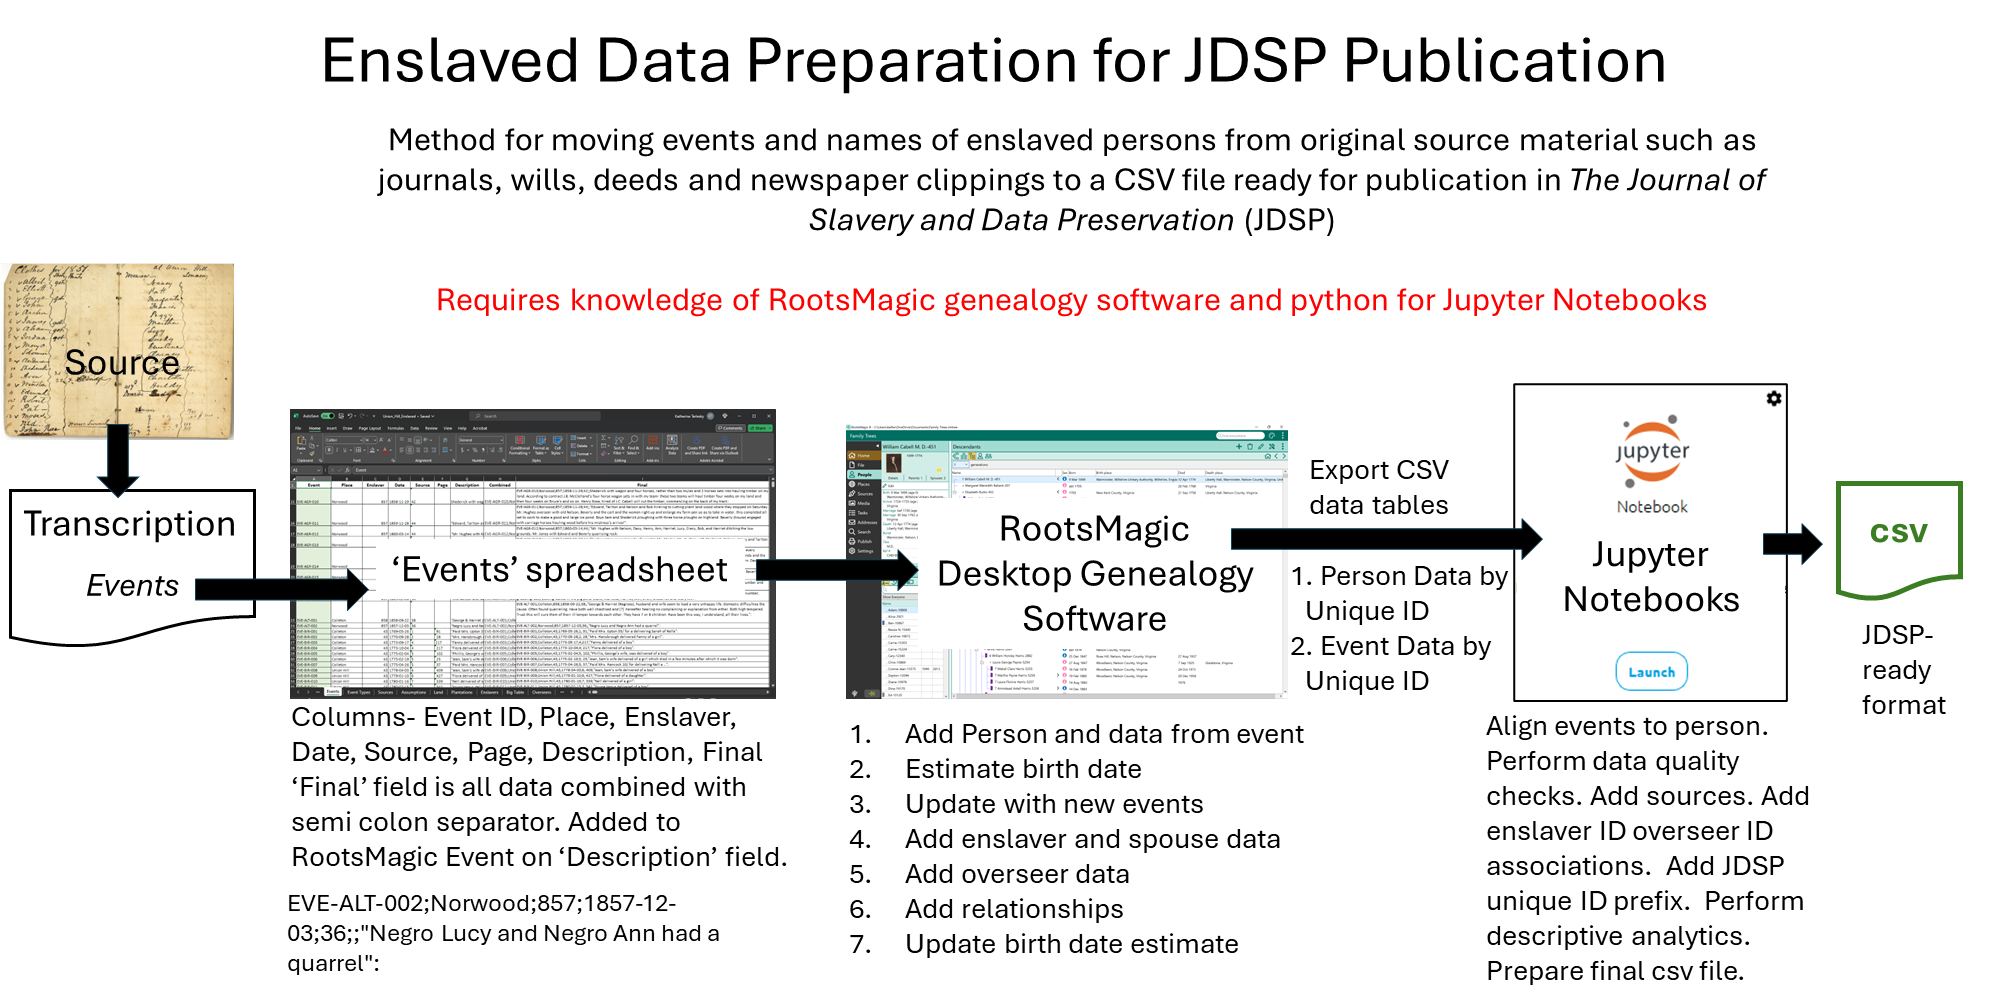

In [1]:
from IPython import display
display.Image(filename="Methodology.png", width=1000, height=1000)

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests

import plotly.express as px
import seaborn as sns

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import rcParams
import matplotlib.animation as animation

import missingno as msno

#import datetime module
import datetime

print('Libraries imported.')

Libraries imported.


## Common Functions

In [3]:
#Trim whitespace from ends of each value across all series in dataframe
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.map(trim_strings)

## Overview of Steps in this Notebook

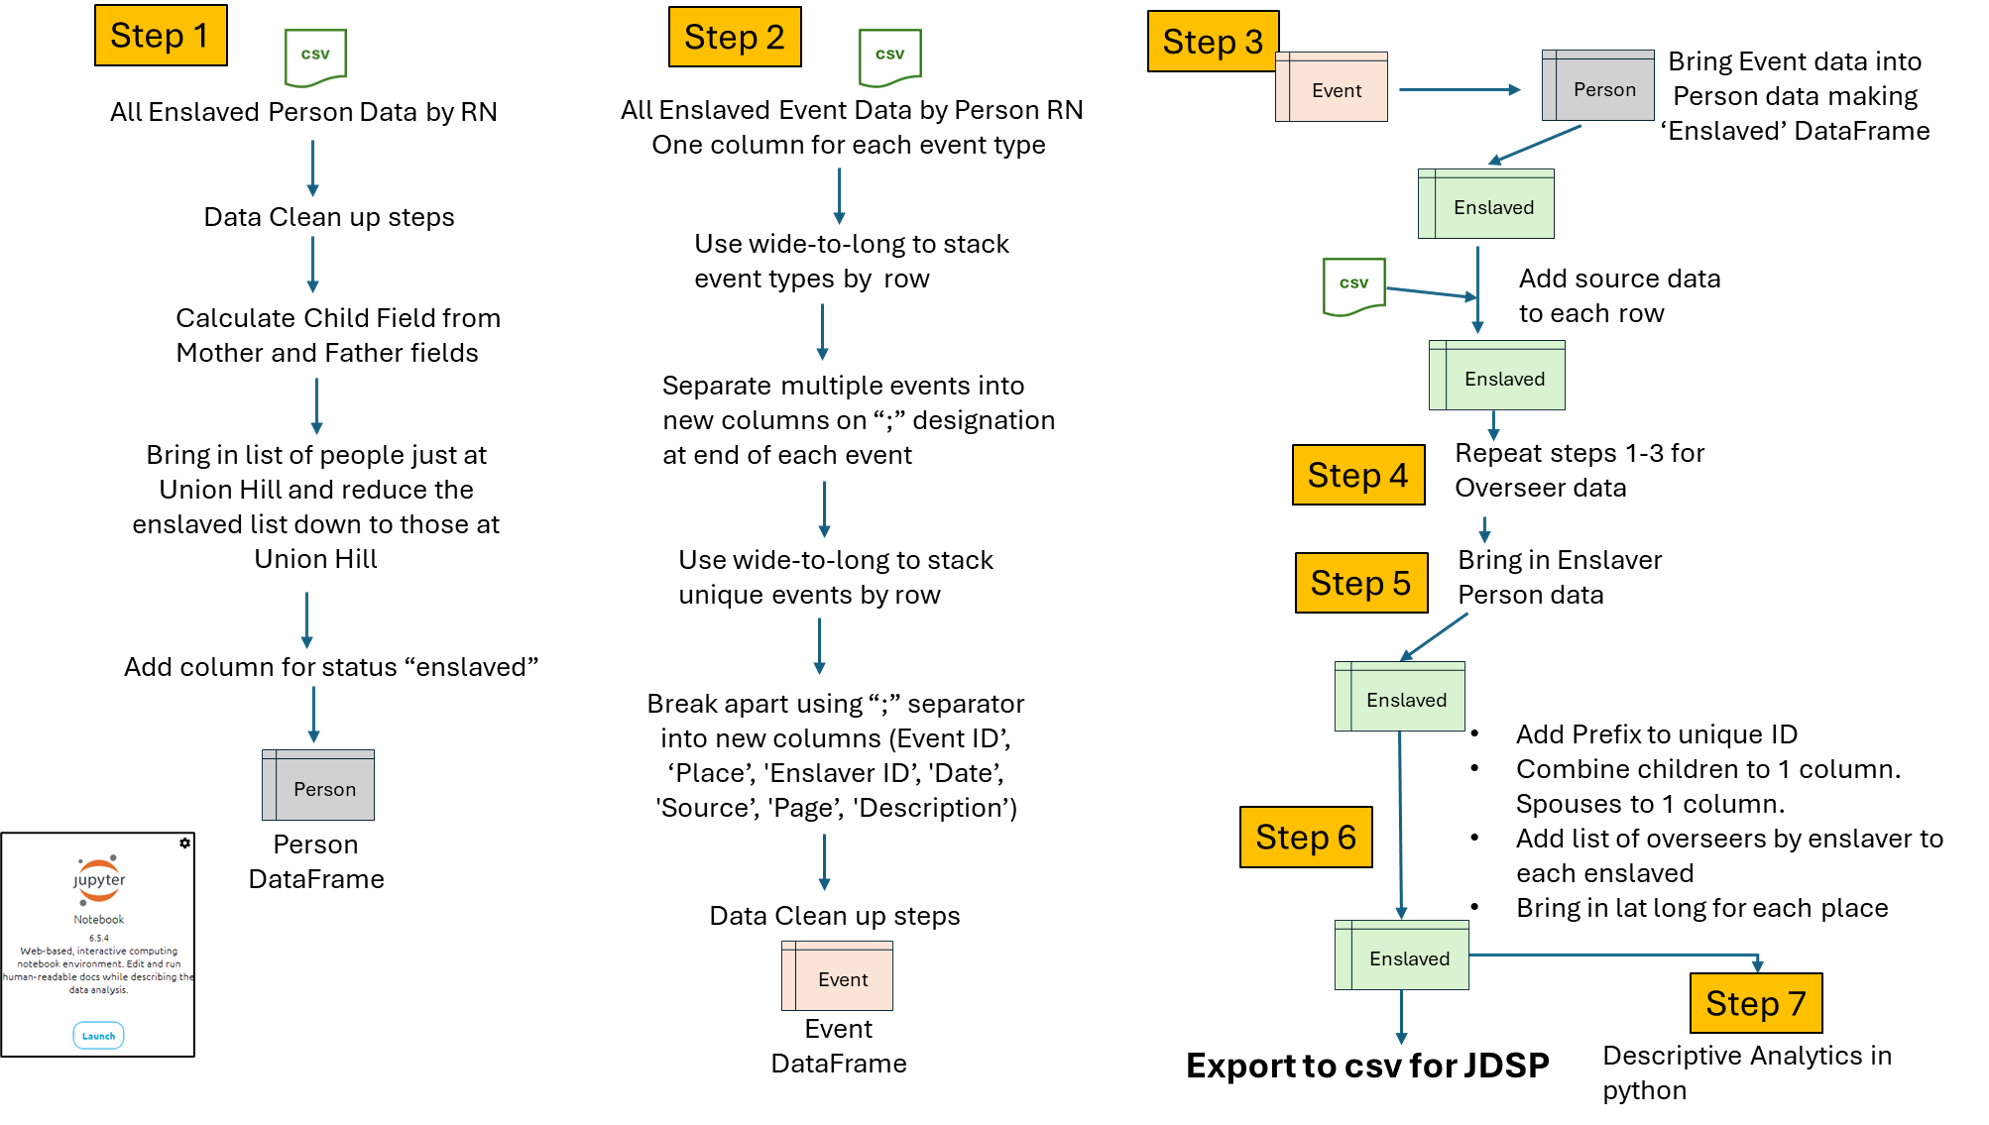

In [4]:
display.Image(filename="PythonSteps.png", width=1000, height=1000)

# STEP 1

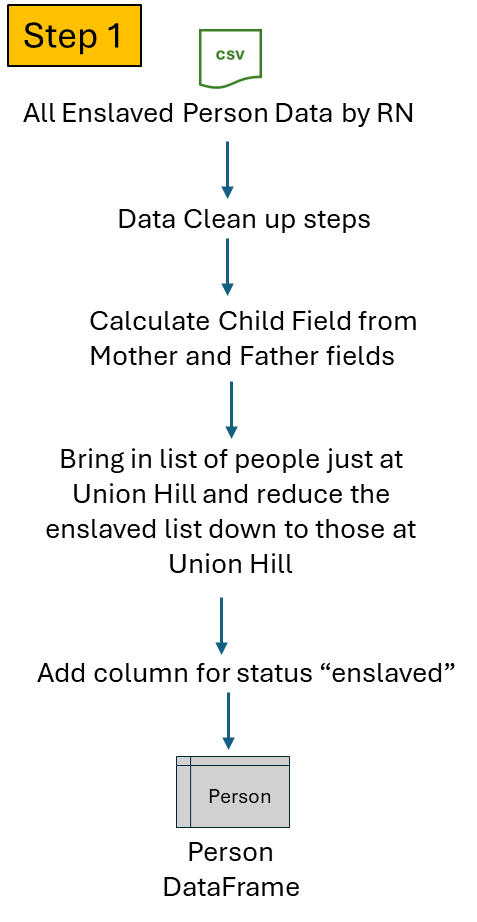

In [5]:
display.Image(filename="FirstStep.png", width=250, height=400)

## Bring in File of Enslaved Person Data from RootsMagic

In [6]:
#import the Masterfile CSV to work with and a column for "order"
file = "EnslavedPersonData_01262024.csv"
person = pd.read_csv(file)
person = trim_all_columns(person)
person = person.rename(columns={'Nickname':'Alternate Name'})
person = person.replace(to_replace='[Unknown] [Unknown]-0', value=np.NaN)
print(person.shape)
person.head()

(634, 10)


,RN,Given Name,Alternate Name,Surname,Sex,Birthdate,Deathdate,Father,Mother,Spouse
0,708,Abby,NaN,NaN,F,abt 1793,NaN,NaN,NaN,NaN
1,639,Abel,NaN,NaN,M,bef 1773,NaN,NaN,NaN,NaN
2,199,Abraham,NaN,NaN,M,1796,NaN,NaN,Lett -86,NaN
3,620,Abraham,NaN,NaN,M,abt 1797,NaN,NaN,"Kate ""Cate"" -152",NaN
4,1035,Abraham,NaN,NaN,M,bef 1798,NaN,NaN,Esther -1037,NaN


### Data Clean Up Steps

In [7]:
# Remove names from Spouse and Parents - just Keep RN
person['Spouse'] = person['Spouse'].replace(regex=[r'\D+'], value="")
person['Father'] = person['Father'].replace(regex=[r'\D+'], value="")
person['Mother'] = person['Mother'].replace(regex=[r'\D+'], value="")
person = person.sort_values('Mother')
person.head(10)

,RN,Given Name,Alternate Name,Surname,Sex,Birthdate,Deathdate,Father,Mother,Spouse
267,121,Joshua,NaN,NaN,M,bef 1765,NaN,14,1,NaN
176,97,George,NaN,NaN,M,bef 1762,NaN,14,1,2
518,102,Unknown,Molly's girl,NaN,F,29 Dec 1795,NaN,NaN,101,NaN
4,1035,Abraham,NaN,NaN,M,bef 1798,NaN,NaN,1037,NaN
553,1075,Henry,NaN,Banks,M,1820,NaN,1065,1067,NaN
555,1072,Margaret,NaN,Banks,F,1835,NaN,1065,1067,NaN
558,1070,Sarah,NaN,Banks,F,1831,NaN,1065,1067,NaN
552,1069,Eveline,NaN,Banks,F,1830,NaN,1065,1067,NaN
550,1074,Daniel,NaN,Banks,M,1837,NaN,1065,1067,NaN
554,1071,Lavinia,Laura,Banks,F,1832,NaN,1065,1067,NaN


### Clean up formats of Birth dates and Death dates

In [8]:
hold =person[['RN','Birthdate']]
hold= hold.sort_values('RN').set_index('RN')
hold = hold['Birthdate'].str.split(pat=' ', expand=True).fillna(np.NaN)
hold=hold.dropna(subset=2)
hold.head()

,0,1,2
RN,,,
3,25,Sep,1780
15,1,Jan,1724
53,26,May,1769
56,28,Sep,1770
57,17,Sep,1773


In [9]:
hold[1] = hold[1].replace(to_replace='Jan', value=1)
hold[1] = hold[1].replace(to_replace='Feb', value=2)
hold[1] = hold[1].replace(to_replace='Mar', value=3)
hold[1] = hold[1].replace(to_replace='Apr', value=4)
hold[1] = hold[1].replace(to_replace='May', value=5)
hold[1] = hold[1].replace(to_replace='Jun', value=6)
hold[1] = hold[1].replace(to_replace='Jul', value=7)
hold[1] = hold[1].replace(to_replace='Aug', value=8)
hold[1] = hold[1].replace(to_replace='Sep', value=9)
hold[1] = hold[1].replace(to_replace='Oct', value=10)
hold[1] = hold[1].replace(to_replace='Nov', value=11)
hold[1] = hold[1].replace(to_replace='Dec', value=12)
hold= hold[[2,1,0]]
hold.head()

,2,1,0
RN,,,
3,1780,9,25
15,1724,1,1
53,1769,5,26
56,1770,9,28
57,1773,9,17


In [10]:
hold = hold.astype(str)
hold['Birth date'] = hold[[2,1,0]].agg('-'.join, axis=1)
hold = hold.drop(columns={2,1,0})
hold.head()

,Birth date
RN,
3,1780-9-25
15,1724-1-1
53,1769-5-26
56,1770-9-28
57,1773-9-17


#### Merge back into person dataframe

In [11]:
person=person.sort_values('RN').set_index('RN')
person = person.join(hold)
person['Birth date'] = person['Birth date'].fillna(person['Birthdate'])
person = person.drop(columns={'Birthdate'})
print(person.shape)
person.head()

(634, 9)


,Given Name,Alternate Name,Surname,Sex,Deathdate,Father,Mother,Spouse,Birth date
RN,,,,,,,,,
1,Venus,NaN,NaN,F,NaN,NaN,NaN,14,bef 1745
2,Hannah,NaN,NaN,F,NaN,NaN,NaN,97,bef 1766
3,Unknown,Hannah's son,NaN,M,NaN,97,2,NaN,1780-9-25
4,Greenock,NaN,NaN,M,NaN,NaN,NaN,NaN,bef 1761
5,Mingo,NaN,NaN,M,NaN,NaN,NaN,NaN,abt 1760


### Clean up Death Dates using same method

In [12]:
person=person.reset_index()
hold =person[['RN','Deathdate']]
hold= hold.sort_values('RN').set_index('RN')
hold = hold['Deathdate'].str.split(pat=' ', expand=True).fillna(np.NaN)
hold=hold.dropna()

hold[1] = hold[1].replace(to_replace='Jan', value=1)
hold[1] = hold[1].replace(to_replace='Feb', value=2)
hold[1] = hold[1].replace(to_replace='Mar', value=3)
hold[1] = hold[1].replace(to_replace='Apr', value=4)
hold[1] = hold[1].replace(to_replace='May', value=5)
hold[1] = hold[1].replace(to_replace='Jun', value=6)
hold[1] = hold[1].replace(to_replace='Jul', value=7)
hold[1] = hold[1].replace(to_replace='Aug', value=8)
hold[1] = hold[1].replace(to_replace='Sep', value=9)
hold[1] = hold[1].replace(to_replace='Oct', value=10)
hold[1] = hold[1].replace(to_replace='Nov', value=11)
hold[1] = hold[1].replace(to_replace='Dec', value=12)
hold= hold[[2,1,0]]

hold = hold.astype(str)
hold['Death date'] = hold[[2,1,0]].agg('-'.join, axis=1)
hold = hold.drop(columns={2,1,0})
hold.head()

,Death date
RN,
6,1773-8-3
14,1795-9-20
15,1784-9-28
18,1789-5-7
26,1790-1-21


In [13]:
person=person.sort_values('RN').set_index('RN')
person = person.join(hold)
person['Death date'] = person['Death date'].fillna(person['Deathdate'])
person = person.drop(columns={'Deathdate'})
person=person.reset_index()
print(person.shape)
person.head()

(634, 10)


,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date
0,1,Venus,NaN,NaN,F,NaN,NaN,14,bef 1745,NaN
1,2,Hannah,NaN,NaN,F,NaN,NaN,97,bef 1766,NaN
2,3,Unknown,Hannah's son,NaN,M,97,2,NaN,1780-9-25,NaN
3,4,Greenock,NaN,NaN,M,NaN,NaN,NaN,bef 1761,NaN
4,5,Mingo,NaN,NaN,M,NaN,NaN,NaN,abt 1760,NaN


### Calculate Child Field from Mother and Father

In [14]:
#create dataframe of Mothers
df = person[['Mother','RN']]
df = df.dropna().sort_values(['Mother','RN'])
print(df.shape)
df.head()

(181, 2)


,Mother,RN
82,1,97
99,1,121
87,101,102
527,1037,1035
531,1067,1068


In [15]:
df['count'] = df.groupby('Mother').cumcount()
df['order'] = df['RN']
df.head(30)

,Mother,RN,count,order
82,1,97,0,97
99,1,121,1,121
87,101,102,0,102
527,1037,1035,0,1035
531,1067,1068,0,1068
532,1067,1069,1,1069
533,1067,1070,2,1070
534,1067,1071,3,1071
535,1067,1072,4,1072
536,1067,1073,5,1073


In [16]:
df = df.sort_values(['Mother','count'])
df.head(20)

,Mother,RN,count,order
82,1,97,0,97
99,1,121,1,121
87,101,102,0,102
527,1037,1035,0,1035
531,1067,1068,0,1068
532,1067,1069,1,1069
533,1067,1070,2,1070
534,1067,1071,3,1071
535,1067,1072,4,1072
536,1067,1073,5,1073


In [17]:
df = df.pivot(index=['Mother','order'], columns='count', values='RN')
df.head(20)

count              0       1       2       3       4       5       6       7
Mother order                                                                
1      97       97.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       121       NaN   121.0     NaN     NaN     NaN     NaN     NaN     NaN
101    102     102.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1037   1035   1035.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1067   1068   1068.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1069      NaN  1069.0     NaN     NaN     NaN     NaN     NaN     NaN
       1070      NaN     NaN  1070.0     NaN     NaN     NaN     NaN     NaN
       1071      NaN     NaN     NaN  1071.0     NaN     NaN     NaN     NaN
       1072      NaN     NaN     NaN     NaN  1072.0     NaN     NaN     NaN
       1073      NaN     NaN     NaN     NaN     NaN  1073.0     NaN     NaN
       1074      NaN     NaN     NaN     NaN     NaN     NaN  1074.0     NaN
       1075      NaN     NaN     NaN     NaN     NaN     NaN     NaN  1075.0
1076   1077   1077.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1080   1081   1081.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1082      NaN  1082.0     NaN     NaN     NaN     NaN     NaN     NaN
1084   1085   1085.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1089   1090   1090.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1091      NaN  1091.0     NaN     NaN     NaN     NaN     NaN     NaN
1093   1094   1094.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1095      NaN  1095.0     NaN     NaN     NaN     NaN     NaN     NaN

In [18]:
df[1] = df[1].shift(periods=-1)
df[2] = df[2].shift(periods=-2)
df[3] = df[3].shift(periods=-3)
df[4] = df[4].shift(periods=-4)
df[5] = df[5].shift(periods=-5)
df[6] = df[6].shift(periods=-6)
df[7] = df[7].shift(periods=-7)
print(df.shape)
df.head(25)

(181, 8)


count              0       1       2       3       4       5       6       7
Mother order                                                                
1      97       97.0   121.0     NaN     NaN     NaN     NaN     NaN     NaN
       121       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
101    102     102.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1037   1035   1035.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1067   1068   1068.0  1069.0  1070.0  1071.0  1072.0  1073.0  1074.0  1075.0
       1069      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1070      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1071      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1072      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1073      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1074      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1075      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1076   1077   1077.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1080   1081   1081.0  1082.0     NaN     NaN     NaN     NaN     NaN     NaN
       1082      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1084   1085   1085.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1089   1090   1090.0  1091.0     NaN     NaN     NaN     NaN     NaN     NaN
       1091      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1093   1094   1094.0  1095.0     NaN     NaN     NaN     NaN     NaN     NaN
       1095      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1097   1098   1098.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN
1101   1102   1102.0  1103.0  1104.0  1105.0  1106.0  1107.0     NaN     NaN
       1103      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1104      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN
       1105      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN

In [19]:
df =df.reset_index(level=1,drop=True).reset_index().dropna(subset=[0])
df.head()

count,Mother,0,1,2,3,4,5,6,7
0,1,97.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN
2,101,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1037,1035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1067,1068.0,1069.0,1070.0,1071.0,1072.0,1073.0,1074.0,1075.0
12,1076,1077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df =df.rename(columns={0:'Child1',1:'Child2',2:'Child3',3:'Child4',4:'Child5',5:'Child6',6:'Child7',7:'Child8','Mother':'RN'})
df = df.replace(to_replace=np.NaN, value=0)
df =df.astype(int)
print(df.shape)
df.head()

(77, 9)


count,RN,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8
0,1,97,121,0,0,0,0,0,0
2,101,102,0,0,0,0,0,0,0
3,1037,1035,0,0,0,0,0,0,0
4,1067,1068,1069,1070,1071,1072,1073,1074,1075
12,1076,1077,0,0,0,0,0,0,0


### Repeat for Father and children

In [21]:
#create dataframe of Fathers
dff = person[['Father','RN']]
dff = dff.dropna().sort_values(['Father','RN'])
print(dff.shape)
dff['count'] = dff.groupby('Father').cumcount()
dff['order'] = dff['RN']
dff = dff.sort_values(['Father','count'])
dff = dff.pivot(index=['Father','order'], columns='count', values='RN')
print(dff.shape)
dff.head()

(105, 2)
(105, 8)


count              0       1       2   3   4   5   6   7
Father order                                            
0812   934     934.0     NaN     NaN NaN NaN NaN NaN NaN
       947       NaN   947.0     NaN NaN NaN NaN NaN NaN
1065   1068   1068.0     NaN     NaN NaN NaN NaN NaN NaN
       1069      NaN  1069.0     NaN NaN NaN NaN NaN NaN
       1070      NaN     NaN  1070.0 NaN NaN NaN NaN NaN

In [22]:
dff[1] = dff[1].shift(periods=-1)
dff[2] = dff[2].shift(periods=-2)
dff[3] = dff[3].shift(periods=-3)
dff[4] = dff[4].shift(periods=-4)
dff[5] = dff[5].shift(periods=-5)
dff[6] = dff[6].shift(periods=-6)
dff[7] = dff[7].shift(periods=-7)

dff =dff.reset_index(level=1,drop=True).reset_index().dropna(subset=[0])

print(dff.shape)
dff.head()

(33, 9)


count,Father,0,1,2,3,4,5,6,7
0,0812,934.0,947.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1065,1068.0,1069.0,1070.0,1071.0,1072.0,1073.0,1074.0,1075.0
10,1079,1081.0,1082.0,NaN,NaN,NaN,NaN,NaN,NaN
12,1092,1094.0,1095.0,NaN,NaN,NaN,NaN,NaN,NaN
14,1096,1098.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
dff =dff.rename(columns={0:'Child1',1:'Child2',2:'Child3',3:'Child4',4:'Child5',5:'Child6',6:'Child7',7:'Child8','Father':'RN'})
dff = dff.replace(to_replace=np.NaN, value=0)
dff =dff.astype(int)
dff.head()

count,RN,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8
0,812,934,947,0,0,0,0,0,0
2,1065,1068,1069,1070,1071,1072,1073,1074,1075
10,1079,1081,1082,0,0,0,0,0,0
12,1092,1094,1095,0,0,0,0,0,0
14,1096,1098,0,0,0,0,0,0,0


### Concatenate Join Mother and Father together

In [24]:
children = pd.concat([df,dff]).sort_values('RN').set_index('RN')
print(children.shape)
children.head()

(110, 8)


count,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8
RN,,,,,,,,
1,97,121,0,0,0,0,0,0
2,3,98,617,618,619,0,0,0
8,36,56,57,0,0,0,0,0
14,97,121,0,0,0,0,0,0
19,36,56,57,0,0,0,0,0


### Rejoin to person Dataframe

In [25]:
person = person.sort_values('RN').set_index('RN')
person = person.join(children).reset_index()
#change falues to int
person[['Father','Mother','Spouse','Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']] =  person[['Father','Mother','Spouse','Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']].replace(to_replace=np.NaN, value=0).astype(int)
#add status column- insert Enslaved
person['Status'] = 'Enslaved'
print(person.shape)
person.head()

(634, 19)


,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Status
0,1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved
1,2,Hannah,NaN,NaN,F,0,0,97,bef 1766,NaN,3,98,617,618,619,0,0,0,Enslaved
2,3,Unknown,Hannah's son,NaN,M,97,2,0,1780-9-25,NaN,0,0,0,0,0,0,0,0,Enslaved
3,4,Greenock,NaN,NaN,M,0,0,0,bef 1761,NaN,0,0,0,0,0,0,0,0,Enslaved
4,5,Mingo,NaN,NaN,M,0,0,0,abt 1760,NaN,0,0,0,0,0,0,0,0,Enslaved


In [26]:
person['Status'] = 'Enslaved'

### Bring in file with RNs of people who were at Union Hill 

In [27]:
#import the Masterfile CSV to work with and a column for "order"
#(Norwood, Union Hill, Montezuma, Colleton, Soldier's Joy, Rock Cliff
file = "UnionHill_01262024.csv"
UHill = pd.read_csv(file).drop_duplicates().sort_values('RN')
UHill = UHill["RN"].tolist()


In [28]:
person = person.sort_values('RN')
person = person[person['RN'].isin(UHill)]
person = person.sort_values('RN').set_index('RN')
print(person.shape)
person.head()


(577, 18)


,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Status
RN,,,,,,,,,,,,,,,,,,
1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved
2,Hannah,NaN,NaN,F,0,0,97,bef 1766,NaN,3,98,617,618,619,0,0,0,Enslaved
3,Unknown,Hannah's son,NaN,M,97,2,0,1780-9-25,NaN,0,0,0,0,0,0,0,0,Enslaved
4,Greenock,NaN,NaN,M,0,0,0,bef 1761,NaN,0,0,0,0,0,0,0,0,Enslaved
5,Mingo,NaN,NaN,M,0,0,0,abt 1760,NaN,0,0,0,0,0,0,0,0,Enslaved


### Insert column for 'Spouse2' to help concatenate step later on

In [29]:
person.loc[:, "Spouse2"] = "0"

# STEP 2

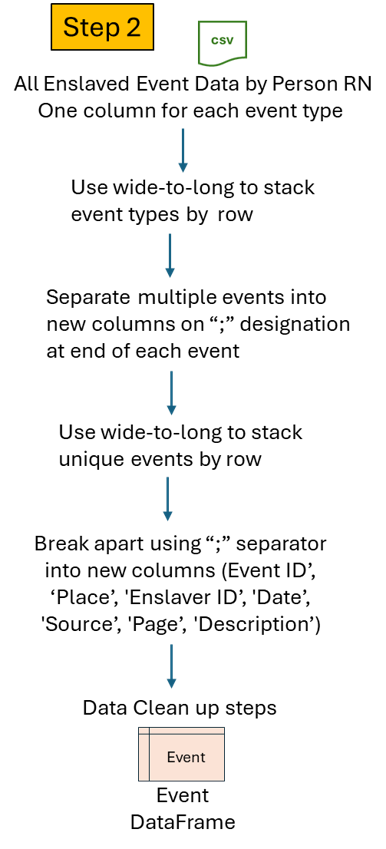

In [30]:
display.Image(filename="SecondStep.png", width=250, height=400)

## Bring in Enslaved Event Data

### REMOVE QUOTATION MARKS FROM ESCEL BEFORE IMPORTING

In [31]:
file = "EnslavedEventData_01282024.csv"
events = pd.read_csv(file)
events = trim_all_columns(events)

print(events.shape)
events.head()

(634, 31)


,RN,EVE-BIR,EVE-DEA,EVE-TRF,EVE-CRM,EVE-DIS,EVE-CRT,EVE-PRO,EVE-NEC,EVE-ENS,EVE-MED,EVE-RES,EVE-HIR,EVE-LAB,EVE-DOM,EVE-TRV,EVE-ADV,EVE-TAX,EVE-WILL,EVE-CRF,EVE-RET,EVE-OVR,EVE-PUN,EVE-MIL,EVE-ALT,EVE-AGR,EVE-EMN,EVE-CEN,EVE-CEM,EVE-ILL,EVE-MAR
0,708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-ENS-008;Soldier's Joy;272;1818;;;Enslaved ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-PRO-019;Soldier's Joy;272;1818;21;120;From...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-ENS-008;Soldier's Joy;272;1818;;;Enslaved ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-PRO-018;Soldier's Joy;272;1818;21;120;From...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-ENS-001;Colleton;43;1798;;;Enslaved by Wil...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-PRO-001;Union Hill;43;1800;14;;Negroes at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-ENS-011;Montezuma;271;1807;;;Enslaved by H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-PRO-016;Montezuma;271;1807-02-26;19;444;Ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1035,NaN,NaN,EVE-TFR-031;Union Hill;44;1816;13;418;Changes ...,NaN,NaN,NaN,NaN,NaN,EVE-ENS-005;Union Hill;44;1810;;;Enslaved by W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVE-TAX-007;Union Hill;44;1810;14;;Date Estima...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Use wide-to-long to get the events stacked

In [32]:
events = pd.wide_to_long(events, stubnames='EVE',i='RN', j='type',sep='-', suffix= '\D+')#text suffixes
events= events.reset_index().drop(columns={'type'}).sort_values('RN').set_index('RN').dropna()
events = trim_all_columns(events)

print(events.shape)
events.head()

(1986, 1)


,EVE
RN,
1,EVE-NEC-002;Colleton;43;1770-09-22;2; 27;Blank...
1,EVE-ENS-001;Colleton;43;1770;;;Enslaved by Wil...
1,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...
2,EVE-PRO-003;Union Hill;43;1800;14;;List of sla...
2,EVE-ENS-004;Union Hill;43;1780;;;Enslaved by W...


### REmove the last ":" colon in each event row - THIS STEP IS CRITICAL

In [33]:
events['EVE'] = events['EVE'].str[:-1]
print(events.shape)
events.head(10)

(1986, 1)


,EVE
RN,
1,EVE-NEC-002;Colleton;43;1770-09-22;2; 27;Blank...
1,EVE-ENS-001;Colleton;43;1770;;;Enslaved by Wil...
1,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...
2,EVE-PRO-003;Union Hill;43;1800;14;;List of sla...
2,EVE-ENS-004;Union Hill;43;1780;;;Enslaved by W...
2,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...
3,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...
3,EVE-ENS-004;Union Hill;43;1780;;;Enslaved by W...
4,EVE-ENS-001;Colleton;43;1775;;;Enslaved by Wil...


### Sort rows by RN and use new index as unique identifier

In [34]:
events = events.reset_index().reset_index().rename(columns={'index':'Order'}).set_index(['Order','RN'])
events.head()

,,EVE
Order,RN,
0,1,EVE-NEC-002;Colleton;43;1770-09-22;2; 27;Blank...
1,1,EVE-ENS-001;Colleton;43;1770;;;Enslaved by Wil...
2,1,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...
3,2,EVE-PRO-003;Union Hill;43;1800;14;;List of sla...
4,2,EVE-ENS-004;Union Hill;43;1780;;;Enslaved by W...


### Now use String Split to separate out multiple events on ":" colon

In [35]:
events =events['EVE'].str.split(pat=':', expand=True).fillna(np.NaN)
events= events.rename(columns={0:'EVE-A',1:'EVE-B',2:'EVE-C',3:'EVE-D',4:'EVE-D',5:'EVE-E',6:'EVE-F',7:'EVE-G',8:'EVE-H',9:'EVE-I',10:'EVE-J',11:'EVE-K',12:'EVE-L',13:'EVE-M',14:'EVE-N',15:'EVE-O',16:'EVE-P',17:'EVE-Q',18:'EVE-R',19:'EVE-S',20:'EVE-T'})
events = events.reset_index()
events = trim_all_columns(events)
print(events.shape)
events.head()

(1986, 21)


,Order,RN,EVE-A,EVE-B,EVE-C,EVE-D,EVE-D,EVE-E,EVE-F,EVE-G,EVE-H,EVE-I,EVE-J,EVE-K,EVE-L,EVE-M,EVE-N,EVE-O,EVE-P,EVE-Q,EVE-R
0,0,1,EVE-NEC-002;Colleton;43;1770-09-22;2; 27;Blank...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,EVE-ENS-001;Colleton;43;1770;;;Enslaved by Wil...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...,EVE-BIR-017;Union Hill;43;1783-11-05;8; 37;Cre...,EVE-BIR-020;Union Hill;43;1785-08-14;8; 89;Sam...,EVE-BIR-021;Union Hill;43;1785-09-22;8; 91;You...,EVE-BIR-026;Union Hill;43;1787-03-03;8; 139;Lu...,EVE-BIR-033;Union Hill;43;1795-07-25;8;303;Han...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,EVE-PRO-003;Union Hill;43;1800;14;;List of sla...,EVE-PRO-016;Montezuma;271;1807-02-26;19;444;Ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,EVE-ENS-004;Union Hill;43;1780;;;Enslaved by W...,EVE-ENS-011;Montezuma;271;1807;;;Enslaved by H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### And stack again using wide-to-long

In [36]:
events = pd.wide_to_long(events, stubnames='EVE',i=['Order','RN'], j='type',sep='-', suffix= '\D+')#text suffixes
events= events.reset_index().drop(columns={'type','Order'}).drop_duplicates().dropna().sort_values('RN').set_index('RN')
print(events.shape)
events.head(10)

(3198, 1)


,EVE
RN,
1,EVE-NEC-002;Colleton;43;1770-09-22;2; 27;Blank...
1,EVE-ENS-001;Colleton;43;1770;;;Enslaved by Wil...
1,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...
1,EVE-BIR-017;Union Hill;43;1783-11-05;8; 37;Cre...
1,EVE-BIR-020;Union Hill;43;1785-08-14;8; 89;Sam...
1,EVE-BIR-021;Union Hill;43;1785-09-22;8; 91;You...
1,EVE-BIR-026;Union Hill;43;1787-03-03;8; 139;Lu...
1,EVE-BIR-033;Union Hill;43;1795-07-25;8;303;Han...
2,EVE-BIR-013;Union Hill;43;1780-09-25;7; 360;Th...


### Now break out to columns for each event using the existing semicolon separator

In [37]:
events =events['EVE'].str.split(pat=';', expand=True)
events = events.rename(columns={0:'Event ID',1:'Place',2:'Enslaver ID',3:'Date',4:'Source',5:'Page',6:'Description'})
events.head()

,Event ID,Place,Enslaver ID,Date,Source,Page,Description
RN,,,,,,,
1,EVE-NEC-002,Colleton,43,1770-09-22,2,27,Blankets gave out 1770. 2 Fanny and her childr...
1,EVE-ENS-001,Colleton,43,1770,,,"Enslaved by William Cabell, Sr."
1,EVE-BIR-013,Union Hill,43,1780-09-25,7,360,The night of the 25 Hannah delivered of a boy ...
1,EVE-BIR-017,Union Hill,43,1783-11-05,8,37,Creasy delivered of a girl by Venus
1,EVE-BIR-020,Union Hill,43,1785-08-14,8,89,Sam J. Cabell’s Fanny delivered of a boy by ol...


In [38]:
events['Source'] = events['Source'].replace(to_replace='', value=0)
events['Source'].value_counts()

Source
0     1008
30     349
12     183
14     154
8      104
33      88
58      79
18      72
21      69
15      64
24      62
13      60
36      57
64      54
37      50
7       49
56      47
61      44
50      42
5       41
44      40
31      34
41      33
38      31
53      30
46      29
2       27
19      26
28      25
52      24
17      23
57      20
35      15
1       14
45      13
29      13
42      13
32      12
23      10
62       9
40       9
16       8
6        8
25       8
39       7
59       6
4        6
11       6
48       4
49       3
20       3
43       2
34       2
55       2
9        2
22       1
10       1
54       1
3        1
60       1
Name: count, dtype: int64

### Data Clean-up

In [39]:
events['Event ID'] = events['Event ID'].replace(to_replace='EVE-WILL-006', value='EVE-PRO-006')
events['Place'] = events['Place'].replace(to_replace='Amherst', value='Amherst County, Virginia')
events['Place'] = events['Place'].replace(to_replace='Amherst, Virginia', value='Amherst County, Virginia')
events['Place'] = events['Place'].replace(to_replace='Bremo, Fluvanna County, Virginia', value='Bremo, Fluvanna, Virginia')

In [40]:
events['Place'].value_counts()

Place
Union Hill                          1455
Colleton                             458
Soldier's Joy                        395
Norwood                              244
Montezuma                            225
Glenmore                             110
Benvenue                              66
Unknown                               45
Amherst County, Virginia              38
Rose Hill                             33
Lovingston, Nelson, Virginia          24
Philadelphia, Pennsylvania            14
Winton, Amherst County, Virginia      13
Mountain View, Clifford, Amherst      12
Rock Cliff                             5
Buckingham County, Virginia            5
Liberty Hall                           5
Halifax County, Virginia               4
Williamsburg, Virginia                 4
Oak Ridge                              4
Midway                                 4
Bremo, Fluvanna, Virginia              3
Hanover, Virginia                      3
Belmont                                3
Richmond, 

### Add column for Event type

In [41]:
events['Event Type'] = events['Event ID'].str[:-4]
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-NEC', value='Necessities')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-DEA', value='Death')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-BIR', value='Birth')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-TRV', value='Travel')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-LAB', value='Labor')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-DOM', value='Domestic')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-CRM', value='Crime')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-TFR', value='Transfer')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-MED', value='Medical')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-AGR', value='Agriculture')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-TAX', value='Tax')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-CFT', value='Craft')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-WILL', value='Will')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-MAR', value='Marriage')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-RES', value='Residence')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-DIS', value='Disappeared')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-RES', value='Residence')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-HIR', value='Hiring')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-PRO', value='Probate')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-ADV', value='Advertisement')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-PUN', value='Punishment')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-ALT', value='Altercation')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-MIL', value='Military')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-OVR', value='Overseer Contract')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-RET', value='Returned')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-EMP', value='Employed')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-MRT', value='Maritime')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-ILL', value='Illness')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-MED', value='Medical')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-CEN', value='Census')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-CEM', value='Cemetery')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-REL', value='Relocation')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-EMN', value='Emancipation')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-ENS', value='Enslaved')
events['Event Type'] = events['Event Type'].replace(to_replace='EVE-CRT', value='Court')

events.head()

,Event ID,Place,Enslaver ID,Date,Source,Page,Description,Event Type
RN,,,,,,,,
1,EVE-NEC-002,Colleton,43,1770-09-22,2,27,Blankets gave out 1770. 2 Fanny and her childr...,Necessities
1,EVE-ENS-001,Colleton,43,1770,0,,"Enslaved by William Cabell, Sr.",Enslaved
1,EVE-BIR-013,Union Hill,43,1780-09-25,7,360,The night of the 25 Hannah delivered of a boy ...,Birth
1,EVE-BIR-017,Union Hill,43,1783-11-05,8,37,Creasy delivered of a girl by Venus,Birth
1,EVE-BIR-020,Union Hill,43,1785-08-14,8,89,Sam J. Cabell’s Fanny delivered of a boy by ol...,Birth


### Add Column for Year

In [42]:
events['Year'] = events['Date'].str[:4]
events['Year'] = events['Year'].astype(int)
events.head()

,Event ID,Place,Enslaver ID,Date,Source,Page,Description,Event Type,Year
RN,,,,,,,,,
1,EVE-NEC-002,Colleton,43,1770-09-22,2,27,Blankets gave out 1770. 2 Fanny and her childr...,Necessities,1770
1,EVE-ENS-001,Colleton,43,1770,0,,"Enslaved by William Cabell, Sr.",Enslaved,1770
1,EVE-BIR-013,Union Hill,43,1780-09-25,7,360,The night of the 25 Hannah delivered of a boy ...,Birth,1780
1,EVE-BIR-017,Union Hill,43,1783-11-05,8,37,Creasy delivered of a girl by Venus,Birth,1783
1,EVE-BIR-020,Union Hill,43,1785-08-14,8,89,Sam J. Cabell’s Fanny delivered of a boy by ol...,Birth,1785


# Step 3

## Join Enslaved Person and Event Data together into final `Enslaved` DataFrame

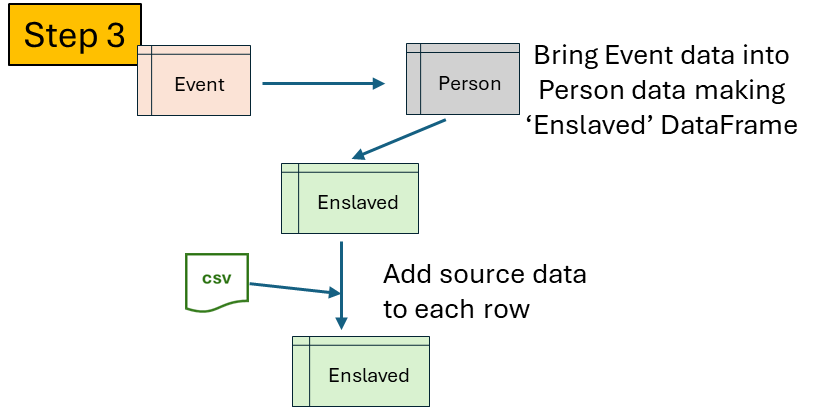

In [43]:
display.Image(filename="ThirdStep.png", width=400, height=400)

In [44]:
enslaved = person.join(events, how='left')
print(enslaved.shape)
enslaved.head()

(3024, 28)


,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Status,Spouse2,Event ID,Place,Enslaver ID,Date,Source,Page,Description,Event Type,Year
RN,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved,0,EVE-NEC-002,Colleton,43,1770-09-22,2,27,Blankets gave out 1770. 2 Fanny and her childr...,Necessities,1770
1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved,0,EVE-ENS-001,Colleton,43,1770,0,,"Enslaved by William Cabell, Sr.",Enslaved,1770
1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved,0,EVE-BIR-013,Union Hill,43,1780-09-25,7,360,The night of the 25 Hannah delivered of a boy ...,Birth,1780
1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved,0,EVE-BIR-017,Union Hill,43,1783-11-05,8,37,Creasy delivered of a girl by Venus,Birth,1783
1,Venus,NaN,NaN,F,0,0,14,bef 1745,NaN,97,121,0,0,0,0,0,0,Enslaved,0,EVE-BIR-020,Union Hill,43,1785-08-14,8,89,Sam J. Cabell’s Fanny delivered of a boy by ol...,Birth,1785


## Add Source data

In [45]:
enslaved = enslaved.reset_index()
enslaved = enslaved[['RN','Given Name','Alternate Name','Surname','Sex','Birth date','Death date','Father','Mother','Spouse','Spouse2','Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8','Event ID','Event Type','Place','Status','Enslaver ID','Date','Year','Description','Source','Page']]
enslaved['Source'] = enslaved['Source'].astype(float)
enslaved.head()

,RN,Given Name,Alternate Name,Surname,Sex,Birth date,Death date,Father,Mother,Spouse,Spouse2,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source,Page
0,1,Venus,NaN,NaN,F,bef 1745,NaN,0,0,14,0,97,121,0,0,0,0,0,0,EVE-NEC-002,Necessities,Colleton,Enslaved,43,1770-09-22,1770,Blankets gave out 1770. 2 Fanny and her childr...,2.0,27
1,1,Venus,NaN,NaN,F,bef 1745,NaN,0,0,14,0,97,121,0,0,0,0,0,0,EVE-ENS-001,Enslaved,Colleton,Enslaved,43,1770,1770,"Enslaved by William Cabell, Sr.",0.0,
2,1,Venus,NaN,NaN,F,bef 1745,NaN,0,0,14,0,97,121,0,0,0,0,0,0,EVE-BIR-013,Birth,Union Hill,Enslaved,43,1780-09-25,1780,The night of the 25 Hannah delivered of a boy ...,7.0,360
3,1,Venus,NaN,NaN,F,bef 1745,NaN,0,0,14,0,97,121,0,0,0,0,0,0,EVE-BIR-017,Birth,Union Hill,Enslaved,43,1783-11-05,1783,Creasy delivered of a girl by Venus,8.0,37
4,1,Venus,NaN,NaN,F,bef 1745,NaN,0,0,14,0,97,121,0,0,0,0,0,0,EVE-BIR-020,Birth,Union Hill,Enslaved,43,1785-08-14,1785,Sam J. Cabell’s Fanny delivered of a boy by ol...,8.0,89


In [46]:
#import the Masterfile CSV to work with and a column for "order"
file = "Sources_01262024.csv"
sources = pd.read_csv(file)
sources = trim_all_columns(sources)
print(sources.shape)
sources.head()

(64, 3)


,Source,Source Description,Repository
0,1,"Cabell, William, Sr. Commonplace books, 1769-1...","Virginia Museum of History and Culture, Richmo..."
1,2,"Cabell, William, Sr. Commonplace books, 1769-1...","Virginia Museum of History and Culture, Richmo..."
2,3,"Cabell, William, Sr. Commonplace books, 1769-1...","Virginia Museum of History and Culture, Richmo..."
3,4,"Cabell, William, Sr. Commonplace books, 1769-1...","Virginia Museum of History and Culture, Richmo..."
4,5,"Cabell, William, Sr. Commonplace books, 1769-1...","Virginia Museum of History and Culture, Richmo..."


### Prepare for joining sources to 'enslaved' dataframe

In [47]:
sources= sources.sort_values('Source').set_index('Source')
enslaved = enslaved.sort_values('Source').set_index('Source')

In [48]:
enslaved = enslaved.join(sources, how='left').reset_index()
enslaved = enslaved[['RN','Given Name','Alternate Name','Surname','Sex','Birth date','Death date','Father','Mother','Spouse','Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8','Event ID','Event Type','Place','Status','Enslaver ID','Date','Year','Description','Source Description','Page','Repository']]
print(enslaved.shape)
enslaved.head()

(3024, 29)


,RN,Given Name,Alternate Name,Surname,Sex,Birth date,Death date,Father,Mother,Spouse,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source Description,Page,Repository
0,1193,Claracy,NaN,NaN,F,abt 1854,NaN,821,321,0,0,0,0,0,0,0,0,0,EVE-ENS-003,Enslaved,Colleton,Enslaved,858,1858,1858,"Enslaved by Joseph Carrington Cabell, Jr.",NaN,,NaN
1,155,Nancy,NaN,NaN,F,bef 1782,NaN,0,0,0,0,0,0,0,0,0,0,0,EVE-ENS-004,Enslaved,Union Hill,Enslaved,43,1792,1792,"Enslaved by William Cabell, Sr.",NaN,,NaN
2,155,Nancy,NaN,NaN,F,bef 1782,NaN,0,0,0,0,0,0,0,0,0,0,0,EVE-ENS-011,Enslaved,Montezuma,Enslaved,271,1807,1807,Enslaved by Hector Cabell,NaN,,NaN
3,668,Jane,NaN,NaN,F,abt 1790,NaN,0,0,0,669,670,0,0,0,0,0,0,EVE-ENS-012,Enslaved,Montezuma,Enslaved,283,1819,1819,Enslaved by Thomas Stanhope McClelland,NaN,,NaN
4,667,Milly,NaN,NaN,F,abt 1830,NaN,665,666,0,0,0,0,0,0,0,0,0,EVE-ENS-013,Enslaved,Montezuma,Enslaved,1034,1858,1858,Enslaved by James Bruce McClelland,NaN,,NaN


## Change Status from Enslaved to Free for events after 1865 and those emancipated

In [49]:
enslaved['Status'].value_counts()

Status
Enslaved    3024
Name: count, dtype: int64

In [50]:
enslaved['Status'] = enslaved['Status'].where(enslaved['Year']<=1865,'Free')
enslaved['Status'].value_counts()

Status
Enslaved    3000
Free          24
Name: count, dtype: int64

In [51]:
enslaved['Status'] = enslaved['Status'].where(enslaved['Event Type'] !='Emancipation','Free')
enslaved['Status'].value_counts()

Status
Enslaved    2991
Free          33
Name: count, dtype: int64

In [52]:
enslaved['Status'] = enslaved['Status'].where(enslaved['Place'] !='Philadelphia, Pennsylvania','Free')
enslaved['Status'].value_counts()

Status
Enslaved    2977
Free          47
Name: count, dtype: int64

In [53]:
enslaved['Status'] = enslaved['Status'].where(enslaved['Place'] != "Bristol, Bucks, Pennsylvania",'Free')
enslaved['Status'].value_counts()

Status
Enslaved    2976
Free          48
Name: count, dtype: int64

# Step 4

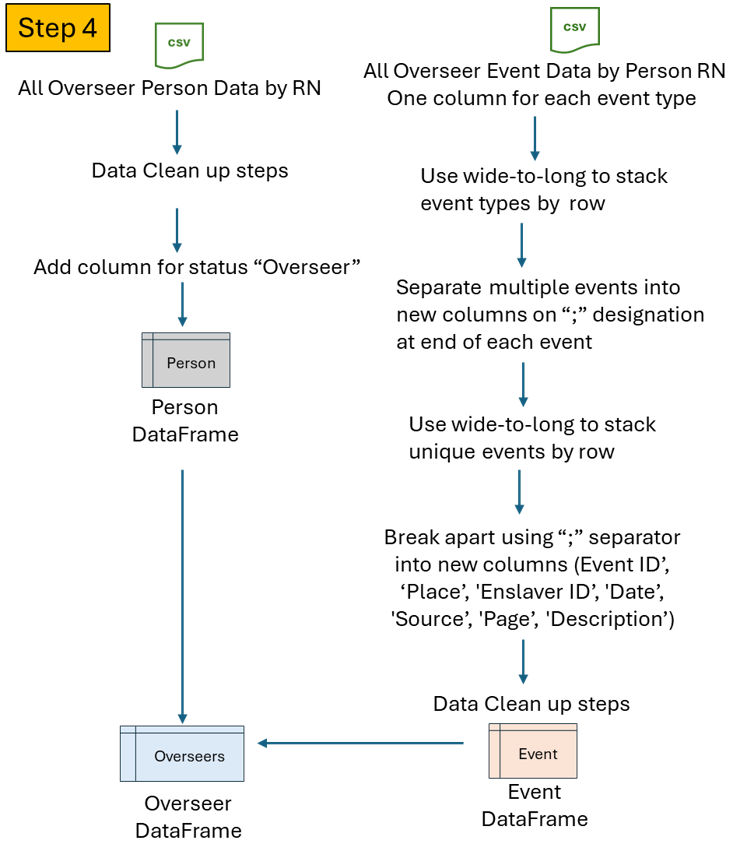

In [54]:
display.Image(filename="FourthStep.png", width=500, height=500)

## Bring in Overseer Person Data

In [55]:
#import the Masterfile CSV to work with and a column for "order"
cols= ['RN','Given Name', 'Alternate Name', 'Surname','Sex','Birthdate','Deathdate','Father','Mother','Spouse']
file = "OVPersonData_01262024.csv"
OVperson = pd.read_csv(file,header=0, names=cols)
OVperson = trim_all_columns(OVperson)

print(OVperson.shape)
OVperson.head()

(47, 10)


,RN,Given Name,Alternate Name,Surname,Sex,Birthdate,Deathdate,Father,Mother,Spouse
0,343,Thomas,NaN,Appling,M,Sep 1755,3 Sep 1835,NaN,NaN,Elizabeth Austin-344
1,968,Langston,NaN,Bacon,M,bef 1779,NaN,NaN,NaN,NaN
2,346,Allen,NaN,Blair,M,1754,1834,NaN,NaN,Mary Ann Staples-368
3,969,R.,NaN,Bolton,M,bef 1797,NaN,NaN,NaN,NaN
4,405,John,NaN,Bryant,M,abt 1755,NaN,John Bryant-404,Elizabeth Hamblett-447,NaN


### Clean up birth and death dates

In [56]:
hold =OVperson[['RN','Birthdate']]
hold= hold.sort_values('RN').set_index('RN')
hold = hold['Birthdate'].str.split(pat=' ', expand=True).fillna(np.NaN)
hold=hold.dropna()

hold[1] = hold[1].replace(to_replace='Jan', value=1)
hold[1] = hold[1].replace(to_replace='Feb', value=2)
hold[1] = hold[1].replace(to_replace='Mar', value=3)
hold[1] = hold[1].replace(to_replace='Apr', value=4)
hold[1] = hold[1].replace(to_replace='May', value=5)
hold[1] = hold[1].replace(to_replace='Jun', value=6)
hold[1] = hold[1].replace(to_replace='Jul', value=7)
hold[1] = hold[1].replace(to_replace='Aug', value=8)
hold[1] = hold[1].replace(to_replace='Sep', value=9)
hold[1] = hold[1].replace(to_replace='Oct', value=10)
hold[1] = hold[1].replace(to_replace='Nov', value=11)
hold[1] = hold[1].replace(to_replace='Dec', value=12)
hold= hold[[2,1,0]]

hold = hold.astype(str)
hold['Birth date'] = hold[[2,1,0]].agg('-'.join, axis=1)
hold = hold.drop(columns={2,1,0})
hold.head()

,Birth date
RN,
355,1767-4-16
446,1759-11-29


In [57]:
OVperson=OVperson.sort_values('RN').set_index('RN')
OVperson = OVperson.join(hold)
OVperson['Birth date'] = OVperson['Birth date'].fillna(OVperson['Birthdate'])
OVperson = OVperson.drop(columns={'Birthdate'})
OVperson=OVperson.reset_index()
print(OVperson.shape)
OVperson.head()

(47, 10)


,RN,Given Name,Alternate Name,Surname,Sex,Deathdate,Father,Mother,Spouse,Birth date
0,173,Henry,NaN,Reid,M,NaN,NaN,NaN,NaN,abt 1762
1,343,Thomas,NaN,Appling,M,3 Sep 1835,NaN,NaN,Elizabeth Austin-344,Sep 1755
2,346,Allen,NaN,Blair,M,1834,NaN,NaN,Mary Ann Staples-368,1754
3,355,Burgess Leon,NaN,Griffin,M,Mar 1839,John Griffin-443,Martha Jopling-444,Virginia Jane Page-365,1767-4-16
4,357,Younger,NaN,Landrum,M,19 Sep 1796,Samuel Landrum-493,Ellizabeth Wortham-495,Patsey Sevier-367,1740


In [58]:
hold =OVperson[['RN','Deathdate']]
hold= hold.sort_values('RN').set_index('RN')
hold = hold['Deathdate'].str.split(pat=' ', expand=True).fillna(np.NaN)
hold=hold.dropna()

hold[1] = hold[1].replace(to_replace='Jan', value=1)
hold[1] = hold[1].replace(to_replace='Feb', value=2)
hold[1] = hold[1].replace(to_replace='Mar', value=3)
hold[1] = hold[1].replace(to_replace='Apr', value=4)
hold[1] = hold[1].replace(to_replace='May', value=5)
hold[1] = hold[1].replace(to_replace='Jun', value=6)
hold[1] = hold[1].replace(to_replace='Jul', value=7)
hold[1] = hold[1].replace(to_replace='Aug', value=8)
hold[1] = hold[1].replace(to_replace='Sep', value=9)
hold[1] = hold[1].replace(to_replace='Oct', value=10)
hold[1] = hold[1].replace(to_replace='Nov', value=11)
hold[1] = hold[1].replace(to_replace='Dec', value=12)
hold= hold[[2,1,0]]

hold = hold.astype(str)
hold['Death date'] = hold[[2,1,0]].agg('-'.join, axis=1)
hold = hold.drop(columns={2,1,0})

OVperson=OVperson.sort_values('RN').set_index('RN')
OVperson = OVperson.join(hold)
OVperson['Death date'] = OVperson['Death date'].fillna(OVperson['Deathdate'])
OVperson = OVperson.drop(columns={'Deathdate'})
OVperson=OVperson.reset_index()
print(OVperson.shape)
OVperson.head()

(47, 10)


,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date
0,173,Henry,NaN,Reid,M,NaN,NaN,NaN,abt 1762,NaN
1,343,Thomas,NaN,Appling,M,NaN,NaN,Elizabeth Austin-344,Sep 1755,1835-9-3
2,346,Allen,NaN,Blair,M,NaN,NaN,Mary Ann Staples-368,1754,1834
3,355,Burgess Leon,NaN,Griffin,M,John Griffin-443,Martha Jopling-444,Virginia Jane Page-365,1767-4-16,Mar 1839
4,357,Younger,NaN,Landrum,M,Samuel Landrum-493,Ellizabeth Wortham-495,Patsey Sevier-367,1740,1796-9-19


In [59]:
OVperson['Spouse'] = OVperson['Spouse'].replace(regex=[r'\D+'], value="")
OVperson['Father'] = OVperson['Father'].replace(regex=[r'\D+'], value="")
OVperson['Mother'] = OVperson['Mother'].replace(regex=[r'\D+'], value="")
OVperson[['Father','Mother','Spouse']] =  OVperson[['Father','Mother','Spouse']].replace(to_replace=np.NaN, value=0).astype(int)

OVperson['Location'] = 'UnionHill'
OVperson['Status'] = 'Overseer'
OVperson.head(10)

,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date,Location,Status
0,173,Henry,NaN,Reid,M,0,0,0,abt 1762,NaN,UnionHill,Overseer
1,343,Thomas,NaN,Appling,M,0,0,344,Sep 1755,1835-9-3,UnionHill,Overseer
2,346,Allen,NaN,Blair,M,0,0,368,1754,1834,UnionHill,Overseer
3,355,Burgess Leon,NaN,Griffin,M,443,444,365,1767-4-16,Mar 1839,UnionHill,Overseer
4,357,Younger,NaN,Landrum,M,493,495,367,1740,1796-9-19,UnionHill,Overseer
5,364,Joseph Innis,NaN,Page,M,514,0,352,1756,abt 1830,UnionHill,Overseer
6,405,John,NaN,Bryant,M,404,447,0,abt 1755,NaN,UnionHill,Overseer
7,406,Permanus,NaN,Bryant,M,404,447,0,abt 1760,NaN,UnionHill,Overseer
8,412,Benjamin,NaN,Camden,M,413,0,390,abt 1762,NaN,UnionHill,Overseer
9,423,Daniel,NaN,Connor,M,0,0,403,abt 1760,NaN,UnionHill,Overseer


In [60]:
OVperson.loc[:, "Child1"] = "0"
OVperson.loc[:, "Child2"] = "0"
OVperson.loc[:, "Child3"] = "0"
OVperson.loc[:, "Child4"] = "0"
OVperson.loc[:, "Child5"] = "0"
OVperson.loc[:, "Child6"] = "0"
OVperson.loc[:, "Child7"] = "0"
OVperson.loc[:, "Child8"] = "0"
OVperson.loc[:, "Spouse2"] = "0"

## Bring in Overseer Event Data

/ IMPORTANT- Remove all quotation marks (") before uploading file from Roots Magic

In [61]:
#import the Masterfile CSV to work with and a column for "order"
file = "OVEventData_01262024.csv"
OVevents = pd.read_csv(file)
OVevents = trim_all_columns(OVevents)

print(OVevents.shape)
OVevents.head()

(47, 17)


,RN,EVE-BIR,EVE-DEA,EVE-TAX,EVE-WILL,EVE-CRF,EVE-RET,EVE-OVR,EVE-PUN,EVE-MIL,EVE-ALT,EVE-AGR,EVE-EMN,EVE-CEN,EVE-CEM,EVE-ILL,EVE-MAR
0,343,NaN,NaN,NaN,NaN,NaN,NaN,EVE-OVR-002;Colleton;44;1792-03-28;12;249;Memo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,968,NaN,NaN,NaN,NaN,NaN,NaN,EVE-OVR-049;Union Hill;44;1799-07-23;12;267;Em...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,346,NaN,NaN,NaN,NaN,NaN,NaN,EVE-OVR-030;Union Hill;43;1788-08-11;8;170;All...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,969,NaN,NaN,NaN,NaN,NaN,NaN,EVE-OVR-050;Union Hill;44;1817-08-16;13;422;Ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,405,NaN,NaN,NaN,NaN,NaN,NaN,EVE-OVR-010;Colleton;43;1773-11-29;4;;John Bry...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
OVevents = pd.wide_to_long(OVevents, stubnames='EVE',i='RN', j='type',sep='-', suffix= '\D+')#text suffixes
OVevents= OVevents.reset_index().drop(columns={'type'}).sort_values('RN').set_index('RN').dropna()
OVevents = trim_all_columns(OVevents)
print(OVevents.shape)
OVevents.head()

(47, 1)


,EVE
RN,
173,EVE-OVR-001;Colleton;44;1792-03-28;12;249;Memo...
343,EVE-OVR-002;Colleton;44;1792-03-28;12;249;Memo...
346,EVE-OVR-030;Union Hill;43;1788-08-11;8;170;All...
355,EVE-OVR-034;Union Hill;43;1791-07-31;8;223;Agr...
357,EVE-OVR-011;Colleton;43;1774-07-25;5;7;Agreed ...


### REmove the last ":" colon in each event row - THIS STEP IS CRITICAL

In [63]:
OVevents['EVE'] = OVevents['EVE'].str[:-1]
print(OVevents.shape)
OVevents.head()

(47, 1)


,EVE
RN,
173,EVE-OVR-001;Colleton;44;1792-03-28;12;249;Memo...
343,EVE-OVR-002;Colleton;44;1792-03-28;12;249;Memo...
346,EVE-OVR-030;Union Hill;43;1788-08-11;8;170;All...
355,EVE-OVR-034;Union Hill;43;1791-07-31;8;223;Agr...
357,EVE-OVR-011;Colleton;43;1774-07-25;5;7;Agreed ...


### Sort rows by RN and use new index as unique identifier

In [64]:
OVevents = OVevents.reset_index().reset_index().rename(columns={'index':'Order'}).set_index(['Order','RN'])
OVevents.head()

,,EVE
Order,RN,
0,173,EVE-OVR-001;Colleton;44;1792-03-28;12;249;Memo...
1,343,EVE-OVR-002;Colleton;44;1792-03-28;12;249;Memo...
2,346,EVE-OVR-030;Union Hill;43;1788-08-11;8;170;All...
3,355,EVE-OVR-034;Union Hill;43;1791-07-31;8;223;Agr...
4,357,EVE-OVR-011;Colleton;43;1774-07-25;5;7;Agreed ...


In [65]:
OVevents =OVevents['EVE'].str.split(pat=':', expand=True).fillna(np.NaN)
OVevents= OVevents.rename(columns={0:'EVE-A',1:'EVE-B',2:'EVE-C',3:'EVE-D',4:'EVE-D',5:'EVE-E',6:'EVE-F',7:'EVE-G',8:'EVE-H',9:'EVE-I',10:'EVE-J',11:'EVE-K',12:'EVE-L',13:'EVE-M',14:'EVE-N',15:'EVE-O',16:'EVE-P',17:'EVE-Q',18:'EVE-R'})
OVevents = OVevents.reset_index()
OVevents = trim_all_columns(OVevents)
print(OVevents.shape)
OVevents.head()

(47, 6)


,Order,RN,EVE-A,EVE-B,EVE-C,EVE-D
0,0,173,EVE-OVR-001;Colleton;44;1792-03-28;12;249;Memo...,EVE-OVR-028;Colleton;44;1787-08-12;11;226;Have...,EVE-OVR-044;Colleton;44;1793-10-16;12;255;Have...,NaN
1,1,343,EVE-OVR-002;Colleton;44;1792-03-28;12;249;Memo...,EVE-OVR-027;Colleton;44;1787-08-12;11;226;Have...,EVE-OVR-036;Colleton;44;1791-07-30;11;246;Have...,EVE-OVR-043;Colleton;44;1793-10-14;12;255;Have...
2,2,346,EVE-OVR-030;Union Hill;43;1788-08-11;8;170;All...,NaN,NaN,NaN
3,3,355,EVE-OVR-034;Union Hill;43;1791-07-31;8;223;Agr...,NaN,NaN,NaN
4,4,357,EVE-OVR-011;Colleton;43;1774-07-25;5;7;Agreed ...,EVE-OVR-012;Colleton;43;1775-09;5;53;Agree wit...,NaN,NaN


In [66]:
OVevents = pd.wide_to_long(OVevents, stubnames='EVE',i=['Order','RN'], j='type',sep='-', suffix= '\D+')#text suffixes
OVevents= OVevents.reset_index().drop(columns={'type','Order'}).drop_duplicates().dropna().sort_values('RN').set_index('RN')
print(OVevents.shape)
OVevents.head(10)

(60, 1)


,EVE
RN,
173,EVE-OVR-001;Colleton;44;1792-03-28;12;249;Memo...
173,EVE-OVR-028;Colleton;44;1787-08-12;11;226;Have...
173,EVE-OVR-044;Colleton;44;1793-10-16;12;255;Have...
343,EVE-OVR-002;Colleton;44;1792-03-28;12;249;Memo...
343,EVE-OVR-027;Colleton;44;1787-08-12;11;226;Have...
343,EVE-OVR-036;Colleton;44;1791-07-30;11;246;Have...
343,EVE-OVR-043;Colleton;44;1793-10-14;12;255;Have...
346,EVE-OVR-030;Union Hill;43;1788-08-11;8;170;All...
355,EVE-OVR-034;Union Hill;43;1791-07-31;8;223;Agr...


### Now break out to columns for each event using the existing semicolon separator

In [67]:
OVevents =OVevents['EVE'].str.split(pat=';', expand=True)
OVevents = OVevents.rename(columns={0:'Event ID',1:'Place',2:'Enslaver ID',3:'Date',4:'Source',5:'Page',6:'Description'})
OVevents.head()

,Event ID,Place,Enslaver ID,Date,Source,Page,Description
RN,,,,,,,
173,EVE-OVR-001,Colleton,44,1792-03-28,12,249,"Memo of agreement with Henry Reid, overseer, f..."
173,EVE-OVR-028,Colleton,44,1787-08-12,11,226,"Have agreed with Henry Read, overseer, to over..."
173,EVE-OVR-044,Colleton,44,1793-10-16,12,255,Have employed Henry Reid to be an overseer the...
343,EVE-OVR-002,Colleton,44,1792-03-28,12,249,"Memo of agreement with Thomas Appling, oversee..."
343,EVE-OVR-027,Colleton,44,1787-08-12,11,226,"Have agreed with Tho. Appling, Overseer, to ov..."


### Add column for Event type

In [68]:
OVevents['Event Type'] = OVevents['Event ID'].str[:-4]
OVevents['Event Type'] = OVevents['Event Type'].replace(to_replace='EVE-OVR', value='Overseer')


### Add column for Year

In [69]:
OVevents['Year'] = OVevents['Date'].str[:4]
OVevents['Year'] = OVevents['Year'].astype(int)
OVevents.head()

,Event ID,Place,Enslaver ID,Date,Source,Page,Description,Event Type,Year
RN,,,,,,,,,
173,EVE-OVR-001,Colleton,44,1792-03-28,12,249,"Memo of agreement with Henry Reid, overseer, f...",Overseer,1792
173,EVE-OVR-028,Colleton,44,1787-08-12,11,226,"Have agreed with Henry Read, overseer, to over...",Overseer,1787
173,EVE-OVR-044,Colleton,44,1793-10-16,12,255,Have employed Henry Reid to be an overseer the...,Overseer,1793
343,EVE-OVR-002,Colleton,44,1792-03-28,12,249,"Memo of agreement with Thomas Appling, oversee...",Overseer,1792
343,EVE-OVR-027,Colleton,44,1787-08-12,11,226,"Have agreed with Tho. Appling, Overseer, to ov...",Overseer,1787


### Now link back to person data

In [70]:
OVperson = OVperson.sort_values('RN').set_index('RN')
overseers = OVperson.join(OVevents, how='left').reset_index()
overseers['RN'] = overseers['RN'].astype(str)
print(overseers.shape)
overseers.head()

(60, 30)


,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Birth date,Death date,Location,Status,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Spouse2,Event ID,Place,Enslaver ID,Date,Source,Page,Description,Event Type,Year
0,173,Henry,NaN,Reid,M,0,0,0,abt 1762,NaN,UnionHill,Overseer,0,0,0,0,0,0,0,0,0,EVE-OVR-001,Colleton,44,1792-03-28,12,249,"Memo of agreement with Henry Reid, overseer, f...",Overseer,1792
1,173,Henry,NaN,Reid,M,0,0,0,abt 1762,NaN,UnionHill,Overseer,0,0,0,0,0,0,0,0,0,EVE-OVR-028,Colleton,44,1787-08-12,11,226,"Have agreed with Henry Read, overseer, to over...",Overseer,1787
2,173,Henry,NaN,Reid,M,0,0,0,abt 1762,NaN,UnionHill,Overseer,0,0,0,0,0,0,0,0,0,EVE-OVR-044,Colleton,44,1793-10-16,12,255,Have employed Henry Reid to be an overseer the...,Overseer,1793
3,343,Thomas,NaN,Appling,M,0,0,344,Sep 1755,1835-9-3,UnionHill,Overseer,0,0,0,0,0,0,0,0,0,EVE-OVR-002,Colleton,44,1792-03-28,12,249,"Memo of agreement with Thomas Appling, oversee...",Overseer,1792
4,343,Thomas,NaN,Appling,M,0,0,344,Sep 1755,1835-9-3,UnionHill,Overseer,0,0,0,0,0,0,0,0,0,EVE-OVR-027,Colleton,44,1787-08-12,11,226,"Have agreed with Tho. Appling, Overseer, to ov...",Overseer,1787


### Add unique identifier Prefix

In [71]:
overseers['Person'] = 'PERS-CAB-'+overseers['RN']+'-UH'


## Create Overseer-hold dataframe for overseers by enslaver for later

In [72]:
OVhold = overseers[['Person','Enslaver ID','Year']]
print(OVhold.shape)
OVhold.head()

(60, 3)


,Person,Enslaver ID,Year
0,PERS-CAB-173-UH,44,1792
1,PERS-CAB-173-UH,44,1787
2,PERS-CAB-173-UH,44,1793
3,PERS-CAB-343-UH,44,1792
4,PERS-CAB-343-UH,44,1787


# Step 5

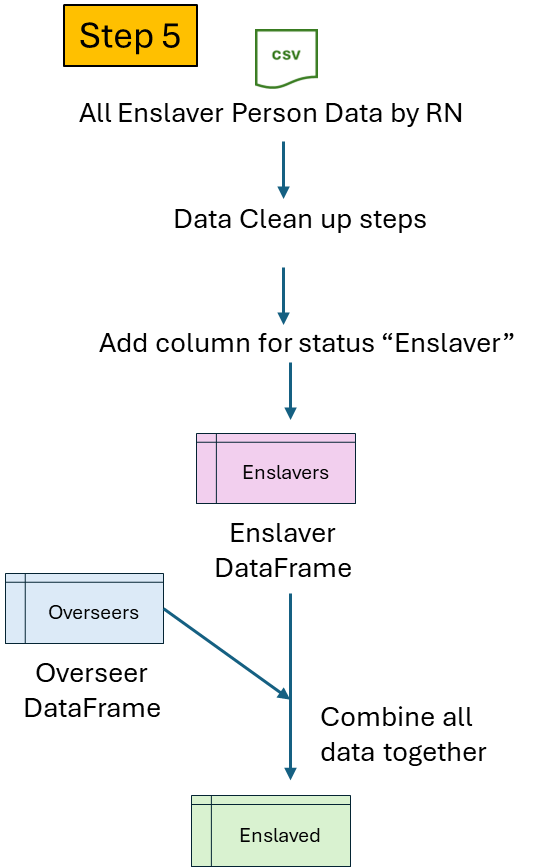

In [73]:
display.Image(filename="Fifth Step.png", width=300, height=300)

## Bring in Enslaver Person Data

In [74]:
#import the Masterfile CSV to work with and a column for "order"
cols= ['RN','Given Name', 'Alternate Name', 'Surname','Sex','Birthdate','Deathdate','Father','Mother','Spouse','Spouse2']
file = "ENSLAVERSPersonData_01162024.csv"
ENperson = pd.read_csv(file, header=0, names=cols)
ENperson = trim_all_columns(ENperson)

print(ENperson.shape)
ENperson.head()

(90, 11)


,RN,Given Name,Alternate Name,Surname,Sex,Birthdate,Deathdate,Father,Mother,Spouse,Spouse2
0,118,James W.,NaN,Alexander,M,abt 1750,29 Jun 1814,NaN,NaN,1042,NaN
1,1178,Martin D.,NaN,Alsom,M,bef 1838,NaN,NaN,NaN,NaN,NaN
2,860,Caroline,NaN,Anthony,F,21 May 1822,3 May 1908,NaN,NaN,45,NaN
3,678,John,NaN,Anthony,M,bef 1825,NaN,NaN,NaN,NaN,NaN
4,911,Anne Blaws,NaN,Barraud,F,1784,1816,NaN,NaN,910,NaN


### Fix Birth and Death dates

In [75]:
hold =ENperson[['RN','Birthdate']]
hold= hold.sort_values('RN').set_index('RN')
hold = hold['Birthdate'].str.split(pat=' ', expand=True).fillna(np.NaN)
hold=hold.dropna()

hold[1] = hold[1].replace(to_replace='Jan', value=1)
hold[1] = hold[1].replace(to_replace='Feb', value=2)
hold[1] = hold[1].replace(to_replace='Mar', value=3)
hold[1] = hold[1].replace(to_replace='Apr', value=4)
hold[1] = hold[1].replace(to_replace='May', value=5)
hold[1] = hold[1].replace(to_replace='Jun', value=6)
hold[1] = hold[1].replace(to_replace='Jul', value=7)
hold[1] = hold[1].replace(to_replace='Aug', value=8)
hold[1] = hold[1].replace(to_replace='Sep', value=9)
hold[1] = hold[1].replace(to_replace='Oct', value=10)
hold[1] = hold[1].replace(to_replace='Nov', value=11)
hold[1] = hold[1].replace(to_replace='Dec', value=12)
hold= hold[[2,1,0]]

hold = hold.astype(str)
hold['Birth date'] = hold[[2,1,0]].agg('-'.join, axis=1)
hold = hold.drop(columns={2,1,0})
hold.head()

,Birth date
RN,
43,1730-3-13
44,1759-3-25
45,1800-11-7
137,1739-10-4
215,1820-11-22


In [76]:
ENperson=ENperson.sort_values('RN').set_index('RN')
ENperson=ENperson.join(hold)
ENperson['Birth date'] = ENperson['Birth date'].fillna(ENperson['Birthdate'])
ENperson = ENperson.drop(columns={'Birthdate'})
ENperson=ENperson.reset_index()
print(ENperson.shape)
ENperson.head()

(90, 11)


,RN,Given Name,Alternate Name,Surname,Sex,Deathdate,Father,Mother,Spouse,Spouse2,Birth date
0,43,William,NaN,Cabell,M,23 Mar 1798,William Cabell MD-42,Elizabeth Burks-48,47,NaN,1730-3-13
1,44,William,NaN,Cabell,M,22 Nov 1822,William Cabell Sr.-43,Margaret Jordan-47,46,NaN,1759-3-25
2,45,Mayo,NaN,Cabell,M,5 May 1869,William Cabell Jr.-44,Anne Nancy Carrington-46,856Caroline Anthony,860.0,1800-11-7
3,46,Anne Nancy,NaN,Carrington,F,1838,Paul Carrington Judge-932,Margaret Read-933,44,NaN,1760
4,47,Margaret,NaN,Jordan,F,1812,Samuel Jordan-131,Ruth Meredith-132,43,NaN,1742


In [77]:
hold =ENperson[['RN','Deathdate']]
hold= hold.sort_values('RN').set_index('RN')
hold = hold['Deathdate'].str.split(pat=' ', expand=True).fillna(np.NaN)
hold=hold.dropna()

hold[1] = hold[1].replace(to_replace='Jan', value=1)
hold[1] = hold[1].replace(to_replace='Feb', value=2)
hold[1] = hold[1].replace(to_replace='Mar', value=3)
hold[1] = hold[1].replace(to_replace='Apr', value=4)
hold[1] = hold[1].replace(to_replace='May', value=5)
hold[1] = hold[1].replace(to_replace='Jun', value=6)
hold[1] = hold[1].replace(to_replace='Jul', value=7)
hold[1] = hold[1].replace(to_replace='Aug', value=8)
hold[1] = hold[1].replace(to_replace='Sep', value=9)
hold[1] = hold[1].replace(to_replace='Oct', value=10)
hold[1] = hold[1].replace(to_replace='Nov', value=11)
hold[1] = hold[1].replace(to_replace='Dec', value=12)
hold= hold[[2,1,0]]

hold = hold.astype(str)
hold['Death date'] = hold[[2,1,0]].agg('-'.join, axis=1)
hold = hold.drop(columns={2,1,0})

ENperson=ENperson.sort_values('RN').set_index('RN')
ENperson = ENperson.join(hold)
ENperson['Death date'] = ENperson['Death date'].fillna(ENperson['Deathdate'])
ENperson = ENperson.drop(columns={'Deathdate'})
ENperson=ENperson.reset_index()
print(ENperson.shape)
ENperson.head()

(90, 11)


,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Spouse2,Birth date,Death date
0,43,William,NaN,Cabell,M,William Cabell MD-42,Elizabeth Burks-48,47,NaN,1730-3-13,1798-3-23
1,44,William,NaN,Cabell,M,William Cabell Sr.-43,Margaret Jordan-47,46,NaN,1759-3-25,1822-11-22
2,45,Mayo,NaN,Cabell,M,William Cabell Jr.-44,Anne Nancy Carrington-46,856Caroline Anthony,860.0,1800-11-7,1869-5-5
3,46,Anne Nancy,NaN,Carrington,F,Paul Carrington Judge-932,Margaret Read-933,44,NaN,1760,1838
4,47,Margaret,NaN,Jordan,F,Samuel Jordan-131,Ruth Meredith-132,43,NaN,1742,1812


In [78]:
ENperson[ENperson['RN']==873]

,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Spouse2,Birth date,Death date
57,873,Mary Virginia,NaN,Ellet,F,NaN,NaN,857,NaN,1839-1-24,1930-7-4


In [79]:
ENperson['Spouse'] = ENperson['Spouse'].replace(regex=[r'\D+'], value=" ")
ENperson['Father'] = ENperson['Father'].replace(regex=[r'\D+'], value=" ")
ENperson['Mother'] = ENperson['Mother'].replace(regex=[r'\D+'], value=" ")
ENperson['Spouse2'] = ENperson['Spouse2'].replace(regex=[r'\D+'], value=" ")
ENperson[['Father','Mother','Spouse','Spouse2']] =  ENperson[['Father','Mother','Spouse','Spouse2']] .replace(to_replace=np.NaN, value=0).astype(int)

ENperson['Location'] = 'UnionHill'
ENperson['Status'] = 'Enslaver'
ENperson.head(10)

,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Spouse2,Birth date,Death date,Location,Status
0,43,William,NaN,Cabell,M,42,48,47,0,1730-3-13,1798-3-23,UnionHill,Enslaver
1,44,William,NaN,Cabell,M,43,47,46,0,1759-3-25,1822-11-22,UnionHill,Enslaver
2,45,Mayo,NaN,Cabell,M,44,46,856,860,1800-11-7,1869-5-5,UnionHill,Enslaver
3,46,Anne Nancy,NaN,Carrington,F,932,933,44,0,1760,1838,UnionHill,Enslaver
4,47,Margaret,NaN,Jordan,F,131,132,43,0,1742,1812,UnionHill,Enslaver
5,51,Mary,NaN,Cabell,F,42,48,139,0,1727,1760,UnionHill,Enslaver
6,106,Adam,NaN,Brown,M,398,0,0,0,abt 1760,1785,UnionHill,Enslaver
7,118,James W.,NaN,Alexander,M,0,0,1042,0,abt 1750,1814-6-29,UnionHill,Enslaver
8,126,William,NaN,Walton,M,0,0,1043,0,1736,1806-1-29,UnionHill,Enslaver
9,131,Samuel,NaN,Jordan,M,0,0,132,0,1711,1789,UnionHill,Enslaver


In [80]:
ENperson.loc[:, "Child1"] = "0"
ENperson.loc[:, "Child2"] = "0"
ENperson.loc[:, "Child3"] = "0"
ENperson.loc[:, "Child4"] = "0"
ENperson.loc[:, "Child5"] = "0"
ENperson.loc[:, "Child6"] = "0"
ENperson.loc[:, "Child7"] = "0"
ENperson.loc[:, "Child8"] = "0"
ENperson.head()

,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Spouse2,Birth date,Death date,Location,Status,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8
0,43,William,NaN,Cabell,M,42,48,47,0,1730-3-13,1798-3-23,UnionHill,Enslaver,0,0,0,0,0,0,0,0
1,44,William,NaN,Cabell,M,43,47,46,0,1759-3-25,1822-11-22,UnionHill,Enslaver,0,0,0,0,0,0,0,0
2,45,Mayo,NaN,Cabell,M,44,46,856,860,1800-11-7,1869-5-5,UnionHill,Enslaver,0,0,0,0,0,0,0,0
3,46,Anne Nancy,NaN,Carrington,F,932,933,44,0,1760,1838,UnionHill,Enslaver,0,0,0,0,0,0,0,0
4,47,Margaret,NaN,Jordan,F,131,132,43,0,1742,1812,UnionHill,Enslaver,0,0,0,0,0,0,0,0


## Join all person and event data together

In [81]:
df = pd.concat([ENperson,overseers])
print(df.shape)
df.head()      

(150, 31)


,RN,Given Name,Alternate Name,Surname,Sex,Father,Mother,Spouse,Spouse2,Birth date,Death date,Location,Status,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Event ID,Place,Enslaver ID,Date,Source,Page,Description,Event Type,Year,Person
0,43,William,NaN,Cabell,M,42,48,47,0,1730-3-13,1798-3-23,UnionHill,Enslaver,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44,William,NaN,Cabell,M,43,47,46,0,1759-3-25,1822-11-22,UnionHill,Enslaver,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45,Mayo,NaN,Cabell,M,44,46,856,860,1800-11-7,1869-5-5,UnionHill,Enslaver,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46,Anne Nancy,NaN,Carrington,F,932,933,44,0,1760,1838,UnionHill,Enslaver,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,Margaret,NaN,Jordan,F,131,132,43,0,1742,1812,UnionHill,Enslaver,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 6

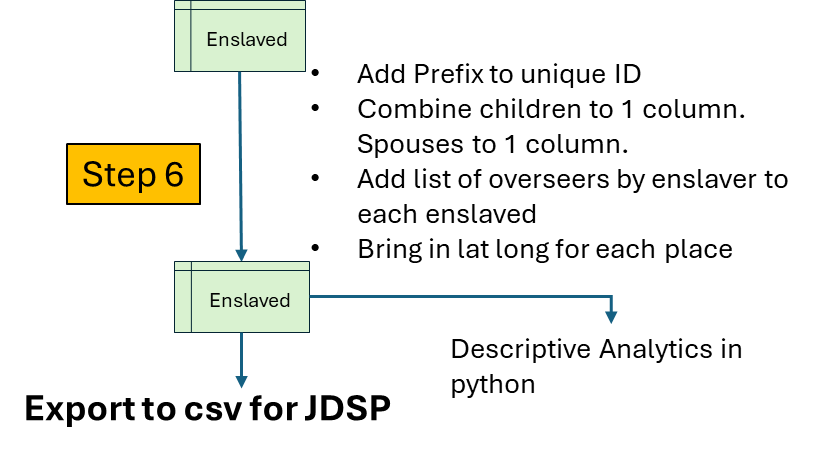

In [82]:
display.Image(filename="SixthStep.png", width=500, height=500)

## Join back to Enslaved DataFrame

In [83]:
enslaved = pd.concat([enslaved,df])
#reorganize columns
enslaved[['RN','Father','Mother','Spouse','Spouse2','Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']] = enslaved[['RN','Father','Mother','Spouse','Spouse2','Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']].fillna('0').astype(str)
print(enslaved.shape)
enslaved.head()

(3174, 33)


,RN,Given Name,Alternate Name,Surname,Sex,Birth date,Death date,Father,Mother,Spouse,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source Description,Page,Repository,Spouse2,Location,Source,Person
0,1193,Claracy,NaN,NaN,F,abt 1854,NaN,821,321,0,0,0,0,0,0,0,0,0,EVE-ENS-003,Enslaved,Colleton,Enslaved,858,1858,1858.0,"Enslaved by Joseph Carrington Cabell, Jr.",NaN,,NaN,0,NaN,NaN,NaN
1,155,Nancy,NaN,NaN,F,bef 1782,NaN,0,0,0,0,0,0,0,0,0,0,0,EVE-ENS-004,Enslaved,Union Hill,Enslaved,43,1792,1792.0,"Enslaved by William Cabell, Sr.",NaN,,NaN,0,NaN,NaN,NaN
2,155,Nancy,NaN,NaN,F,bef 1782,NaN,0,0,0,0,0,0,0,0,0,0,0,EVE-ENS-011,Enslaved,Montezuma,Enslaved,271,1807,1807.0,Enslaved by Hector Cabell,NaN,,NaN,0,NaN,NaN,NaN
3,668,Jane,NaN,NaN,F,abt 1790,NaN,0,0,0,669,670,0,0,0,0,0,0,EVE-ENS-012,Enslaved,Montezuma,Enslaved,283,1819,1819.0,Enslaved by Thomas Stanhope McClelland,NaN,,NaN,0,NaN,NaN,NaN
4,667,Milly,NaN,NaN,F,abt 1830,NaN,665,666,0,0,0,0,0,0,0,0,0,EVE-ENS-013,Enslaved,Montezuma,Enslaved,1034,1858,1858.0,Enslaved by James Bruce McClelland,NaN,,NaN,0,NaN,NaN,NaN


## Fix Individual to have 'PERS-CAB-' in front of the RN and '-UH' on the back of the RN

### For each plantation set, the last element will change, but the person can be matched across plantations with the prefix and number part

In [84]:
enslaved['Person'] = 'PERS-CAB-'+enslaved['RN']+'-UH'
enslaved['Father'] = 'PERS-CAB-'+enslaved['Father']+'-UH'
enslaved['Mother'] = 'PERS-CAB-'+enslaved['Mother']+'-UH'
enslaved['Spouse'] = 'PERS-CAB-'+enslaved['Spouse']+'-UH'
enslaved['Spouse2'] = 'PERS-CAB-'+enslaved['Spouse2']+'-UH'
enslaved['Enslaver ID'] = 'PERS-CAB-'+enslaved['Enslaver ID']+'-UH'
print(enslaved.shape)
enslaved.head()

(3174, 33)


,RN,Given Name,Alternate Name,Surname,Sex,Birth date,Death date,Father,Mother,Spouse,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source Description,Page,Repository,Spouse2,Location,Source,Person
0,1193,Claracy,NaN,NaN,F,abt 1854,NaN,PERS-CAB-821-UH,PERS-CAB-321-UH,PERS-CAB-0-UH,0,0,0,0,0,0,0,0,EVE-ENS-003,Enslaved,Colleton,Enslaved,PERS-CAB-858-UH,1858,1858.0,"Enslaved by Joseph Carrington Cabell, Jr.",NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-1193-UH
1,155,Nancy,NaN,NaN,F,bef 1782,NaN,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,0,0,0,0,0,0,0,0,EVE-ENS-004,Enslaved,Union Hill,Enslaved,PERS-CAB-43-UH,1792,1792.0,"Enslaved by William Cabell, Sr.",NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-155-UH
2,155,Nancy,NaN,NaN,F,bef 1782,NaN,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,0,0,0,0,0,0,0,0,EVE-ENS-011,Enslaved,Montezuma,Enslaved,PERS-CAB-271-UH,1807,1807.0,Enslaved by Hector Cabell,NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-155-UH
3,668,Jane,NaN,NaN,F,abt 1790,NaN,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,669,670,0,0,0,0,0,0,EVE-ENS-012,Enslaved,Montezuma,Enslaved,PERS-CAB-283-UH,1819,1819.0,Enslaved by Thomas Stanhope McClelland,NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-668-UH
4,667,Milly,NaN,NaN,F,abt 1830,NaN,PERS-CAB-665-UH,PERS-CAB-666-UH,PERS-CAB-0-UH,0,0,0,0,0,0,0,0,EVE-ENS-013,Enslaved,Montezuma,Enslaved,PERS-CAB-1034-UH,1858,1858.0,Enslaved by James Bruce McClelland,NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-667-UH


In [85]:
enslaved[['Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']] = enslaved[['Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']].astype(str)
enslaved['Child1'] = 'PERS-CAB-'+enslaved['Child1']+'-UH'
enslaved['Child2'] = 'PERS-CAB-'+enslaved['Child2']+'-UH'
enslaved['Child3'] = 'PERS-CAB-'+enslaved['Child3']+'-UH'
enslaved['Child4'] = 'PERS-CAB-'+enslaved['Child4']+'-UH'
enslaved['Child5'] = 'PERS-CAB-'+enslaved['Child5']+'-UH'
enslaved['Child6'] = 'PERS-CAB-'+enslaved['Child6']+'-UH'
enslaved['Child7'] = 'PERS-CAB-'+enslaved['Child7']+'-UH'
enslaved['Child8'] = 'PERS-CAB-'+enslaved['Child8']+'-UH'
print(enslaved.shape)
enslaved.head()

(3174, 33)


,RN,Given Name,Alternate Name,Surname,Sex,Birth date,Death date,Father,Mother,Spouse,Child1,Child2,Child3,Child4,Child5,Child6,Child7,Child8,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source Description,Page,Repository,Spouse2,Location,Source,Person
0,1193,Claracy,NaN,NaN,F,abt 1854,NaN,PERS-CAB-821-UH,PERS-CAB-321-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,EVE-ENS-003,Enslaved,Colleton,Enslaved,PERS-CAB-858-UH,1858,1858.0,"Enslaved by Joseph Carrington Cabell, Jr.",NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-1193-UH
1,155,Nancy,NaN,NaN,F,bef 1782,NaN,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,EVE-ENS-004,Enslaved,Union Hill,Enslaved,PERS-CAB-43-UH,1792,1792.0,"Enslaved by William Cabell, Sr.",NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-155-UH
2,155,Nancy,NaN,NaN,F,bef 1782,NaN,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,EVE-ENS-011,Enslaved,Montezuma,Enslaved,PERS-CAB-271-UH,1807,1807.0,Enslaved by Hector Cabell,NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-155-UH
3,668,Jane,NaN,NaN,F,abt 1790,NaN,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-669-UH,PERS-CAB-670-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,EVE-ENS-012,Enslaved,Montezuma,Enslaved,PERS-CAB-283-UH,1819,1819.0,Enslaved by Thomas Stanhope McClelland,NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-668-UH
4,667,Milly,NaN,NaN,F,abt 1830,NaN,PERS-CAB-665-UH,PERS-CAB-666-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,PERS-CAB-0-UH,EVE-ENS-013,Enslaved,Montezuma,Enslaved,PERS-CAB-1034-UH,1858,1858.0,Enslaved by James Bruce McClelland,NaN,,NaN,PERS-CAB-0-UH,NaN,NaN,PERS-CAB-667-UH


In [86]:
#Now clear all 'PERS-0'
enslaved = enslaved.replace(to_replace='PERS-CAB-0-UH', value='')
enslaved = enslaved.replace(to_replace='PERS-CAB--UH', value='')
#enslaved['Enslaver ID'].value_counts()

## Combine Children into one column

In [87]:
enslaved['Children'] = enslaved[['Child1','Child2','Child3','Child4','Child5','Child6','Child7','Child8']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
# Fix order of the columns
enslaved = enslaved[['Person','Given Name','Alternate Name','Surname','Sex','RN','Birth date','Death date','Father','Mother','Spouse','Spouse2','Children','Event ID','Event Type','Place','Status','Enslaver ID','Date','Year','Description','Source Description','Page','Repository']]
enslaved.head()


,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Spouse,Spouse2,Children,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source Description,Page,Repository
0,PERS-CAB-1193-UH,Claracy,NaN,NaN,F,1193,abt 1854,NaN,PERS-CAB-821-UH,PERS-CAB-321-UH,,,,EVE-ENS-003,Enslaved,Colleton,Enslaved,PERS-CAB-858-UH,1858,1858.0,"Enslaved by Joseph Carrington Cabell, Jr.",NaN,,NaN
1,PERS-CAB-155-UH,Nancy,NaN,NaN,F,155,bef 1782,NaN,,,,,,EVE-ENS-004,Enslaved,Union Hill,Enslaved,PERS-CAB-43-UH,1792,1792.0,"Enslaved by William Cabell, Sr.",NaN,,NaN
2,PERS-CAB-155-UH,Nancy,NaN,NaN,F,155,bef 1782,NaN,,,,,,EVE-ENS-011,Enslaved,Montezuma,Enslaved,PERS-CAB-271-UH,1807,1807.0,Enslaved by Hector Cabell,NaN,,NaN
3,PERS-CAB-668-UH,Jane,NaN,NaN,F,668,abt 1790,NaN,,,,,PERS-CAB-669-UH PERS-CAB-670-UH,EVE-ENS-012,Enslaved,Montezuma,Enslaved,PERS-CAB-283-UH,1819,1819.0,Enslaved by Thomas Stanhope McClelland,NaN,,NaN
4,PERS-CAB-667-UH,Milly,NaN,NaN,F,667,abt 1830,NaN,PERS-CAB-665-UH,PERS-CAB-666-UH,,,,EVE-ENS-013,Enslaved,Montezuma,Enslaved,PERS-CAB-1034-UH,1858,1858.0,Enslaved by James Bruce McClelland,NaN,,NaN


## Combine Spouse into one column

In [88]:
enslaved['Spouses'] = enslaved[['Spouse','Spouse2']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
enslaved = enslaved.drop(columns={'Spouse','Spouse2'})
print(enslaved.shape)
enslaved.head(5)

(3174, 23)


,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Children,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year,Description,Source Description,Page,Repository,Spouses
0,PERS-CAB-1193-UH,Claracy,NaN,NaN,F,1193,abt 1854,NaN,PERS-CAB-821-UH,PERS-CAB-321-UH,,EVE-ENS-003,Enslaved,Colleton,Enslaved,PERS-CAB-858-UH,1858,1858.0,"Enslaved by Joseph Carrington Cabell, Jr.",NaN,,NaN,
1,PERS-CAB-155-UH,Nancy,NaN,NaN,F,155,bef 1782,NaN,,,,EVE-ENS-004,Enslaved,Union Hill,Enslaved,PERS-CAB-43-UH,1792,1792.0,"Enslaved by William Cabell, Sr.",NaN,,NaN,
2,PERS-CAB-155-UH,Nancy,NaN,NaN,F,155,bef 1782,NaN,,,,EVE-ENS-011,Enslaved,Montezuma,Enslaved,PERS-CAB-271-UH,1807,1807.0,Enslaved by Hector Cabell,NaN,,NaN,
3,PERS-CAB-668-UH,Jane,NaN,NaN,F,668,abt 1790,NaN,,,PERS-CAB-669-UH PERS-CAB-670-UH,EVE-ENS-012,Enslaved,Montezuma,Enslaved,PERS-CAB-283-UH,1819,1819.0,Enslaved by Thomas Stanhope McClelland,NaN,,NaN,
4,PERS-CAB-667-UH,Milly,NaN,NaN,F,667,abt 1830,NaN,PERS-CAB-665-UH,PERS-CAB-666-UH,,EVE-ENS-013,Enslaved,Montezuma,Enslaved,PERS-CAB-1034-UH,1858,1858.0,Enslaved by James Bruce McClelland,NaN,,NaN,


## Add List of Overseers by enslaver to RN's 

In [89]:
OVhold.head()

,Person,Enslaver ID,Year
0,PERS-CAB-173-UH,44,1792
1,PERS-CAB-173-UH,44,1787
2,PERS-CAB-173-UH,44,1793
3,PERS-CAB-343-UH,44,1792
4,PERS-CAB-343-UH,44,1787


In [90]:
OVhold = OVhold.sort_values('Year').rename(columns={'Person':'Overseer'}).drop(columns={'Year'}).drop_duplicates().sort_values(['Enslaver ID','Overseer'])
OVhold['count'] = OVhold.groupby('Enslaver ID').cumcount()
OVhold = OVhold.sort_values(['Enslaver ID','count']).reset_index().rename(columns={'index':'order'})

print(OVhold.shape)
OVhold.head(10)

(50, 4)


,order,Overseer,Enslaver ID,count
0,26,PERS-CAB-531-UH,272,0
1,7,PERS-CAB-346-UH,43,0
2,8,PERS-CAB-355-UH,43,1
3,9,PERS-CAB-357-UH,43,2
4,11,PERS-CAB-364-UH,43,3
5,14,PERS-CAB-405-UH,43,4
6,15,PERS-CAB-406-UH,43,5
7,16,PERS-CAB-412-UH,43,6
8,17,PERS-CAB-423-UH,43,7
9,18,PERS-CAB-425-UH,43,8


In [91]:
hold = OVhold.pivot(index=['Enslaver ID','order'], columns='count', values='Overseer')
print(hold.shape)
hold.head(10)

(50, 28)


count                           0                1                2   \
Enslaver ID order                                                      
272         26     PERS-CAB-531-UH              NaN              NaN   
43          7      PERS-CAB-346-UH              NaN              NaN   
            8                  NaN  PERS-CAB-355-UH              NaN   
            9                  NaN              NaN  PERS-CAB-357-UH   
            11                 NaN              NaN              NaN   
            14                 NaN              NaN              NaN   
            15                 NaN              NaN              NaN   
            16                 NaN              NaN              NaN   
            17                 NaN              NaN              NaN   
            18                 NaN              NaN              NaN   

count                           3                4                5   \
Enslaver ID order                                                      
272         26                 NaN              NaN              NaN   
43          7                  NaN              NaN              NaN   
            8                  NaN              NaN              NaN   
            9                  NaN              NaN              NaN   
            11     PERS-CAB-364-UH              NaN              NaN   
            14                 NaN  PERS-CAB-405-UH              NaN   
            15                 NaN              NaN  PERS-CAB-406-UH   
            16                 NaN              NaN              NaN   
            17                 NaN              NaN              NaN   
            18                 NaN              NaN              NaN   

count                           6                7                8    9   \
Enslaver ID order                                                           
272         26                 NaN              NaN              NaN  NaN   
43          7                  NaN              NaN              NaN  NaN   
            8                  NaN              NaN              NaN  NaN   
            9                  NaN              NaN              NaN  NaN   
            11                 NaN              NaN              NaN  NaN   
            14                 NaN              NaN              NaN  NaN   
            15                 NaN              NaN              NaN  NaN   
            16     PERS-CAB-412-UH              NaN              NaN  NaN   
            17                 NaN  PERS-CAB-423-UH              NaN  NaN   
            18                 NaN              NaN  PERS-CAB-425-UH  NaN   

count               10   11   12   13   14   15   16   17   18   19   20   21  \
Enslaver ID order                                                               
272         26     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
43          7      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            8      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            9      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            11     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            14     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            15     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            16     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            17     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
            18     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

count               22   23   24   25   26   27  
Enslaver ID order                                
272         26     NaN  NaN  NaN  NaN  NaN  NaN  
43          7      NaN  NaN  NaN  NaN  NaN  NaN  
            8      NaN  NaN  NaN  NaN  NaN  NaN  
            9      NaN  NaN  NaN  NaN  NaN  NaN  
            11     NaN  NaN  NaN  NaN  NaN  NaN  
            14     NaN

### Shift all overseers by enslaver to one line for the enslaver

In [92]:
hold[1] = hold[1].shift(periods=-1)
hold[2] = hold[2].shift(periods=-2)
hold[3] = hold[3].shift(periods=-3)
hold[4] = hold[4].shift(periods=-4)
hold[5] = hold[5].shift(periods=-5)
hold[6] = hold[6].shift(periods=-6)
hold[7] = hold[7].shift(periods=-7)
hold[8] = hold[8].shift(periods=-8)
hold[9] = hold[9].shift(periods=-9)
hold[10] = hold[10].shift(periods=-10)
hold[11] = hold[11].shift(periods=-11)
hold[12] = hold[12].shift(periods=-12)
hold[13] = hold[13].shift(periods=-13)
hold[14] = hold[14].shift(periods=-14)
hold[15] = hold[15].shift(periods=-15)
hold[16] = hold[16].shift(periods=-16)
hold[17] = hold[17].shift(periods=-17)
hold[18] = hold[18].shift(periods=-18)
hold[19] = hold[19].shift(periods=-19)
hold[20] = hold[20].shift(periods=-20)
hold[21] = hold[21].shift(periods=-21)
hold[22] = hold[22].shift(periods=-22)
hold[23] = hold[23].shift(periods=-23)
hold[24] = hold[24].shift(periods=-24)
hold[25] = hold[25].shift(periods=-25)
hold[26] = hold[26].shift(periods=-26)
hold[27] = hold[27].shift(periods=-27)

hold = hold.reset_index(level=1,drop=True).reset_index().dropna(subset=[0])
hold

count,Enslaver ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,272,PERS-CAB-531-UH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43,PERS-CAB-346-UH,PERS-CAB-355-UH,PERS-CAB-357-UH,PERS-CAB-364-UH,PERS-CAB-405-UH,PERS-CAB-406-UH,PERS-CAB-412-UH,PERS-CAB-423-UH,PERS-CAB-425-UH,PERS-CAB-430-UH,PERS-CAB-446-UH,PERS-CAB-459-UH,PERS-CAB-462-UH,PERS-CAB-477-UH,PERS-CAB-507-UH,PERS-CAB-513-UH,PERS-CAB-532-UH,PERS-CAB-534-UH,PERS-CAB-539-UH,PERS-CAB-549-UH,PERS-CAB-556-UH,PERS-CAB-560-UH,PERS-CAB-561-UH,PERS-CAB-562-UH,PERS-CAB-571-UH,PERS-CAB-587-UH,PERS-CAB-597-UH,PERS-CAB-965-UH
29,44,PERS-CAB-173-UH,PERS-CAB-343-UH,PERS-CAB-560-UH,PERS-CAB-561-UH,PERS-CAB-575-UH,PERS-CAB-967-UH,PERS-CAB-968-UH,PERS-CAB-969-UH,PERS-CAB-970-UH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None
43,45,PERS-CAB-1000-UH,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
44,857,PERS-CAB-977-UH,PERS-CAB-981-UH,PERS-CAB-987-UH,PERS-CAB-989-UH,PERS-CAB-998-UH,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
49,858,PERS-CAB-998-UH,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [93]:
hold = hold.fillna('0')
hold

count,Enslaver ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,272,PERS-CAB-531-UH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,PERS-CAB-346-UH,PERS-CAB-355-UH,PERS-CAB-357-UH,PERS-CAB-364-UH,PERS-CAB-405-UH,PERS-CAB-406-UH,PERS-CAB-412-UH,PERS-CAB-423-UH,PERS-CAB-425-UH,PERS-CAB-430-UH,PERS-CAB-446-UH,PERS-CAB-459-UH,PERS-CAB-462-UH,PERS-CAB-477-UH,PERS-CAB-507-UH,PERS-CAB-513-UH,PERS-CAB-532-UH,PERS-CAB-534-UH,PERS-CAB-539-UH,PERS-CAB-549-UH,PERS-CAB-556-UH,PERS-CAB-560-UH,PERS-CAB-561-UH,PERS-CAB-562-UH,PERS-CAB-571-UH,PERS-CAB-587-UH,PERS-CAB-597-UH,PERS-CAB-965-UH
29,44,PERS-CAB-173-UH,PERS-CAB-343-UH,PERS-CAB-560-UH,PERS-CAB-561-UH,PERS-CAB-575-UH,PERS-CAB-967-UH,PERS-CAB-968-UH,PERS-CAB-969-UH,PERS-CAB-970-UH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43,45,PERS-CAB-1000-UH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,857,PERS-CAB-977-UH,PERS-CAB-981-UH,PERS-CAB-987-UH,PERS-CAB-989-UH,PERS-CAB-998-UH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49,858,PERS-CAB-998-UH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
hold = hold.astype(str)
hold['Enslaver ID'] = 'PERS-CAB-'+ hold['Enslaver ID']+'-UH'
#Now clear all 'PERS-0'
hold = hold.replace(to_replace='0', value='')
hold

count,Enslaver ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,PERS-CAB-272-UH,PERS-CAB-531-UH,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PERS-CAB-43-UH,PERS-CAB-346-UH,PERS-CAB-355-UH,PERS-CAB-357-UH,PERS-CAB-364-UH,PERS-CAB-405-UH,PERS-CAB-406-UH,PERS-CAB-412-UH,PERS-CAB-423-UH,PERS-CAB-425-UH,PERS-CAB-430-UH,PERS-CAB-446-UH,PERS-CAB-459-UH,PERS-CAB-462-UH,PERS-CAB-477-UH,PERS-CAB-507-UH,PERS-CAB-513-UH,PERS-CAB-532-UH,PERS-CAB-534-UH,PERS-CAB-539-UH,PERS-CAB-549-UH,PERS-CAB-556-UH,PERS-CAB-560-UH,PERS-CAB-561-UH,PERS-CAB-562-UH,PERS-CAB-571-UH,PERS-CAB-587-UH,PERS-CAB-597-UH,PERS-CAB-965-UH
29,PERS-CAB-44-UH,PERS-CAB-173-UH,PERS-CAB-343-UH,PERS-CAB-560-UH,PERS-CAB-561-UH,PERS-CAB-575-UH,PERS-CAB-967-UH,PERS-CAB-968-UH,PERS-CAB-969-UH,PERS-CAB-970-UH,,,,,,,,,,,,,,,,,,,
43,PERS-CAB-45-UH,PERS-CAB-1000-UH,,,,,,,,,,,,,,,,,,,,,,,,,,,
44,PERS-CAB-857-UH,PERS-CAB-977-UH,PERS-CAB-981-UH,PERS-CAB-987-UH,PERS-CAB-989-UH,PERS-CAB-998-UH,,,,,,,,,,,,,,,,,,,,,,,
49,PERS-CAB-858-UH,PERS-CAB-998-UH,,,,,,,,,,,,,,,,,,,,,,,,,,,


### Combine overseers into one column

In [95]:
hold['Overseers'] = hold[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
hold = hold.drop(columns={0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27})
hold

count,Enslaver ID,Overseers
0,PERS-CAB-272-UH,PERS-CAB-531-UH
1,PERS-CAB-43-UH,PERS-CAB-346-UH PERS-CAB-355-UH PERS-CAB-357-U...
29,PERS-CAB-44-UH,PERS-CAB-173-UH PERS-CAB-343-UH PERS-CAB-560-U...
43,PERS-CAB-45-UH,PERS-CAB-1000-UH
44,PERS-CAB-857-UH,PERS-CAB-977-UH PERS-CAB-981-UH PERS-CAB-987-U...
49,PERS-CAB-858-UH,PERS-CAB-998-UH


In [96]:
hold = hold.sort_values('Enslaver ID').set_index('Enslaver ID').unstack().to_frame().reset_index().rename(columns={0:'Overseers'}).drop(columns={'count'})
hold

,Enslaver ID,Overseers
0,PERS-CAB-272-UH,PERS-CAB-531-UH
1,PERS-CAB-43-UH,PERS-CAB-346-UH PERS-CAB-355-UH PERS-CAB-357-U...
2,PERS-CAB-44-UH,PERS-CAB-173-UH PERS-CAB-343-UH PERS-CAB-560-U...
3,PERS-CAB-45-UH,PERS-CAB-1000-UH
4,PERS-CAB-857-UH,PERS-CAB-977-UH PERS-CAB-981-UH PERS-CAB-987-U...
5,PERS-CAB-858-UH,PERS-CAB-998-UH


In [97]:
hold = hold.sort_values('Enslaver ID').set_index('Enslaver ID')

### Rejoin overseers by enslaverID to enslaved dataframe

In [98]:
enslaved['Enslaver ID'].value_counts().head(10)

Enslaver ID
PERS-CAB-45-UH      760
PERS-CAB-44-UH      553
PERS-CAB-43-UH      550
PERS-CAB-857-UH     256
PERS-CAB-272-UH     155
PERS-CAB-1088-UH    147
PERS-CAB-283-UH      96
PERS-CAB-858-UH      89
PERS-CAB-1065-UH     89
PERS-CAB-271-UH      53
Name: count, dtype: int64

In [99]:
enslaved = enslaved.sort_values('Enslaver ID').set_index('Enslaver ID')

In [100]:
enslaved.head()

,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Children,Event ID,Event Type,Place,Status,Date,Year,Description,Source Description,Page,Repository,Spouses
Enslaver ID,,,,,,,,,,,,,,,,,,,,,,
,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,,,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...,EVE-RES-032,Residence,"Washington, DC",Free,1866-11-24,1866.0,"Opened Bank account in Washington, D.C Account...",Records of the Field Offices for the State of ...,,Ancestry.com (http://ancestry.com),PERS-CAB-308-UH
,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,,EVE-CEN-006,Census,"Lovingston, Nelson, Virginia",Free,1870-08-13,1870.0,"Dwelling 964, Family1000 Early Family.Simon, J...","Virginia, Lovingston, Nelson.1870 U.S. census....",376A,"Ancestry.com ( http://www.ancestry.com, 2009)",PERS-CAB-1028-UH
,PERS-CAB-804-UH,Fanny,NaN,Hatcher,F,804,1851-4-25,NaN,PERS-CAB-320-UH,PERS-CAB-299-UH,,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...","Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)",
,PERS-CAB-299-UH,Nancy,NaN,Black,F,299,abt 1827,NaN,,,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...","Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)",PERS-CAB-320-UH
,PERS-CAB-320-UH,John,NaN,Hatcher,M,320,abt 1825,NaN,,PERS-CAB-800-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...","Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)",PERS-CAB-299-UH


In [101]:
enslaved = enslaved.join(hold).reset_index()
print(enslaved.shape)
enslaved.head(5)

(3174, 24)


,Enslaver ID,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Children,Event ID,Event Type,Place,Status,Date,Year,Description,Source Description,Page,Repository,Spouses,Overseers
0,,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,,,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...,EVE-RES-032,Residence,"Washington, DC",Free,1866-11-24,1866.0,"Opened Bank account in Washington, D.C Account...",Records of the Field Offices for the State of ...,,Ancestry.com (http://ancestry.com),PERS-CAB-308-UH,NaN
1,,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,,EVE-CEN-006,Census,"Lovingston, Nelson, Virginia",Free,1870-08-13,1870.0,"Dwelling 964, Family1000 Early Family.Simon, J...","Virginia, Lovingston, Nelson.1870 U.S. census....",376A,"Ancestry.com ( http://www.ancestry.com, 2009)",PERS-CAB-1028-UH,NaN
2,,PERS-CAB-804-UH,Fanny,NaN,Hatcher,F,804,1851-4-25,NaN,PERS-CAB-320-UH,PERS-CAB-299-UH,,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...","Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)",,NaN
3,,PERS-CAB-299-UH,Nancy,NaN,Black,F,299,abt 1827,NaN,,,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...","Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)",PERS-CAB-320-UH,NaN
4,,PERS-CAB-320-UH,John,NaN,Hatcher,M,320,abt 1825,NaN,,PERS-CAB-800-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...","Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)",PERS-CAB-299-UH,NaN


In [102]:
enslaved['Place'].value_counts()

Place
Union Hill                          1483
Colleton                             476
Soldier's Joy                        396
Norwood                              236
Montezuma                            225
Benvenue                              53
Unknown                               41
Amherst County, Virginia              38
Lovingston, Nelson, Virginia          21
Philadelphia, Pennsylvania            14
Winton, Amherst County, Virginia      13
Mountain View, Clifford, Amherst      12
Glenmore                              11
Liberty Hall                           5
Rock Cliff                             5
Buckingham County, Virginia            5
Oak Ridge                              4
Midway                                 4
Halifax County, Virginia               4
Williamsburg, Virginia                 4
Rose Hill                              3
Belmont                                3
Bremo, Fluvanna, Virginia              3
Richmond, Virginia                     2
Fluvanna C

## Bring in Lat Long of homes and places

In [103]:
#import the Masterfile CSV to work with and a column for "order"
file = "geo_places.csv"
homes = pd.read_csv(file).rename(columns={'Home':'Place'})
homes = trim_all_columns(homes)
print(homes.shape)
homes.head()

(89, 3)


,Place,lat,long
0,Above Centre Hill,37.564051,-78.839138
1,Alta Vista (Rectory),37.644952,-78.808547
2,Banister Lodge,36.769458,-78.917682
3,Belmont,37.675520,-78.833410
4,Below Centre Hill,37.540904,-78.838915


In [104]:
homes = homes[['Place','lat','long']]
homes= homes.sort_values('Place')
homes.head()

,Place,lat,long
0,Above Centre Hill,37.564051,-78.839138
1,Alta Vista (Rectory),37.644952,-78.808547
74,"Amherst County, Virginia",37.581712,-79.048750
73,"Amherst, Virginia",37.581712,-79.048750
80,"Augusta County, Virginia, United States",38.129496,-79.120816


In [105]:
#DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)
enslaved = enslaved.merge(homes, how='left',left_on='Place', right_on='Place')
# Fix order of the columns
enslaved = enslaved[['Person','Given Name','Alternate Name','Surname','Sex','RN','Birth date','Death date','Father','Mother','Spouses','Children','Event ID','Event Type','Place','lat','long','Status','Enslaver ID','Date','Year','Description','Overseers','Source Description','Page','Repository']]

print(enslaved.shape)
enslaved.head()

(3174, 26)


,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Spouses,Children,Event ID,Event Type,Place,lat,long,Status,Enslaver ID,Date,Year,Description,Overseers,Source Description,Page,Repository
0,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,,,PERS-CAB-308-UH,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...,EVE-RES-032,Residence,"Washington, DC",38.906445,-77.036548,Free,,1866-11-24,1866.0,"Opened Bank account in Washington, D.C Account...",NaN,Records of the Field Offices for the State of ...,,Ancestry.com (http://ancestry.com)
1,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,PERS-CAB-1028-UH,,EVE-CEN-006,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,,1870-08-13,1870.0,"Dwelling 964, Family1000 Early Family.Simon, J...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",376A,"Ancestry.com ( http://www.ancestry.com, 2009)"
2,PERS-CAB-804-UH,Fanny,NaN,Hatcher,F,804,1851-4-25,NaN,PERS-CAB-320-UH,PERS-CAB-299-UH,,,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)"
3,PERS-CAB-299-UH,Nancy,NaN,Black,F,299,abt 1827,NaN,,,PERS-CAB-320-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)"
4,PERS-CAB-320-UH,John,NaN,Hatcher,M,320,abt 1825,NaN,,PERS-CAB-800-UH,PERS-CAB-299-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)"


## Replace blank cells with np.NaN

In [106]:
enslaved = enslaved.replace(to_replace='', value=np.NaN)
enslaved['Spouses'] = enslaved['Spouses'].replace(to_replace=' ', value=np.NaN)
enslaved['Children'] = enslaved['Children'].replace(to_replace='       ', value=np.NaN)
enslaved['Enslaver ID'] = enslaved['Enslaver ID'].replace(to_replace='       ', value=np.NaN)
enslaved.head()

,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Spouses,Children,Event ID,Event Type,Place,lat,long,Status,Enslaver ID,Date,Year,Description,Overseers,Source Description,Page,Repository
0,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,NaN,NaN,PERS-CAB-308-UH,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...,EVE-RES-032,Residence,"Washington, DC",38.906445,-77.036548,Free,NaN,1866-11-24,1866.0,"Opened Bank account in Washington, D.C Account...",NaN,Records of the Field Offices for the State of ...,NaN,Ancestry.com (http://ancestry.com)
1,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,PERS-CAB-1028-UH,NaN,EVE-CEN-006,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,NaN,1870-08-13,1870.0,"Dwelling 964, Family1000 Early Family.Simon, J...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",376A,"Ancestry.com ( http://www.ancestry.com, 2009)"
2,PERS-CAB-804-UH,Fanny,NaN,Hatcher,F,804,1851-4-25,NaN,PERS-CAB-320-UH,PERS-CAB-299-UH,NaN,NaN,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,NaN,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)"
3,PERS-CAB-299-UH,Nancy,NaN,Black,F,299,abt 1827,NaN,NaN,NaN,PERS-CAB-320-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,NaN,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)"
4,PERS-CAB-320-UH,John,NaN,Hatcher,M,320,abt 1825,NaN,NaN,PERS-CAB-800-UH,PERS-CAB-299-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,NaN,1870-09-08,1870.0,"Dwelling 800, Family 900. Hatcher, Jno, Nancy,...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",369A,"Ancestry.com ( http://www.ancestry.com, 2009)"


In [107]:
enslaved['Enslaver ID'].value_counts()

Enslaver ID
PERS-CAB-45-UH      760
PERS-CAB-44-UH      553
PERS-CAB-43-UH      550
PERS-CAB-857-UH     256
PERS-CAB-272-UH     155
PERS-CAB-1088-UH    147
PERS-CAB-283-UH      96
PERS-CAB-1065-UH     89
PERS-CAB-858-UH      89
PERS-CAB-271-UH      53
PERS-CAB-1034-UH     44
PERS-CAB-216-UH      42
PERS-CAB-280-UH      28
PERS-CAB-207-UH      23
PERS-CAB-46-UH       17
PERS-CAB-282-UH      16
PERS-CAB-276-UH      15
PERS-CAB-277-UH      12
PERS-CAB-1134-UH      7
PERS-CAB-214-UH       6
PERS-CAB-866-UH       6
PERS-CAB-904-UH       6
PERS-CAB-131-UH       5
PERS-CAB-919-UH       5
PERS-CAB-262-UH       5
PERS-CAB-269-UH       4
PERS-CAB-1147-UH      4
PERS-CAB-1154-UH      4
PERS-CAB-213-UH       3
PERS-CAB-265-UH       3
PERS-CAB-677-UH       3
PERS-CAB-126-UH       3
PERS-CAB-757-UH       2
PERS-CAB-485-UH       2
PERS-CAB-755-UH       2
PERS-CAB-1151-UH      2
PERS-CAB-735-UH       2
PERS-CAB-1132-UH      2
PERS-CAB-915-UH       2
PERS-CAB-1129-UH      2
PERS-CAB-1137-UH      1
PERS

# Step 7 

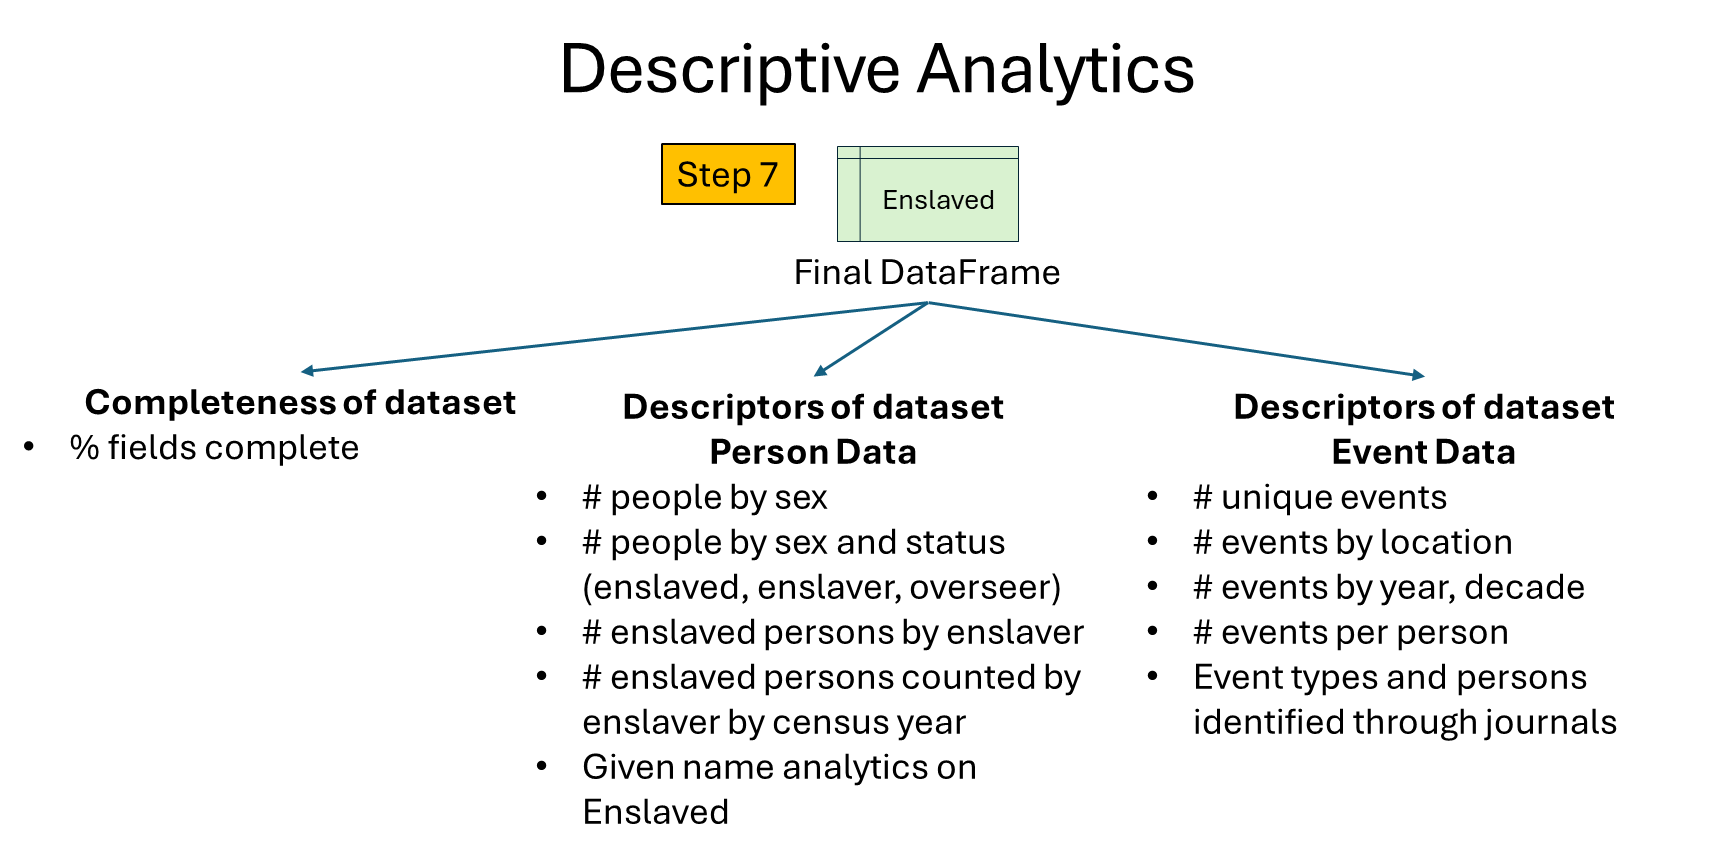

In [108]:
display.Image(filename="Descriptive Anal.png", width=1000, height=1000)

## Data Field Completeness of Person Data

In [109]:
Persons = enslaved[['Person','Given Name','Alternate Name','Surname','Sex','RN','Birth date','Death date','Father','Mother','Spouses','Children']]
print(Persons.shape)
Persons = Persons.drop_duplicates()
print(Persons.shape)
Persons.head()

(3174, 12)
(714, 12)


,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Spouses,Children
0,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,NaN,NaN,PERS-CAB-308-UH,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...
1,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,PERS-CAB-1028-UH,NaN
2,PERS-CAB-804-UH,Fanny,NaN,Hatcher,F,804,1851-4-25,NaN,PERS-CAB-320-UH,PERS-CAB-299-UH,NaN,NaN
3,PERS-CAB-299-UH,Nancy,NaN,Black,F,299,abt 1827,NaN,NaN,NaN,PERS-CAB-320-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...
4,PERS-CAB-320-UH,John,NaN,Hatcher,M,320,abt 1825,NaN,NaN,PERS-CAB-800-UH,PERS-CAB-299-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...


In [110]:
Persons.isnull().sum()

Person              0
Given Name          0
Alternate Name    652
Surname           495
Sex                 0
RN                  0
Birth date          0
Death date        602
Father            550
Mother            491
Spouses           545
Children          608
dtype: int64

<Axes: >

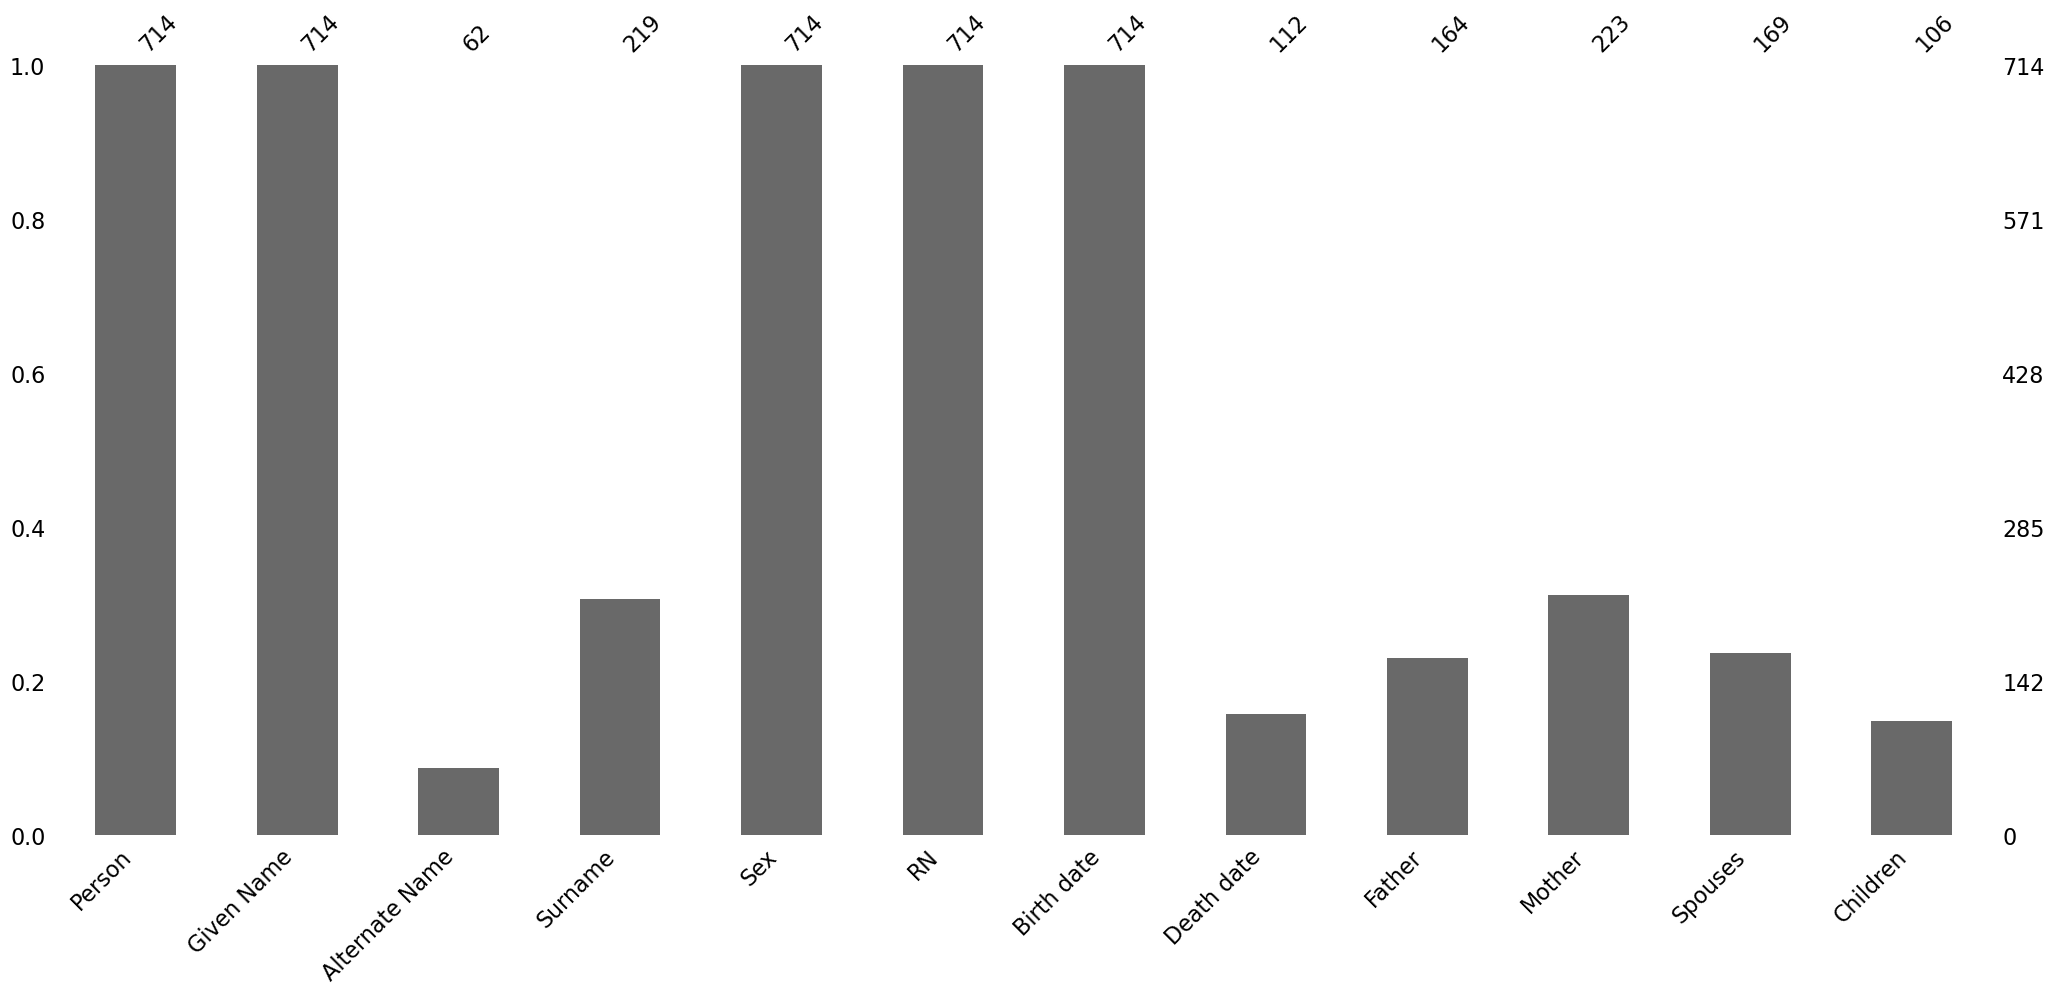

In [111]:
msno.bar(Persons)

<Axes: >

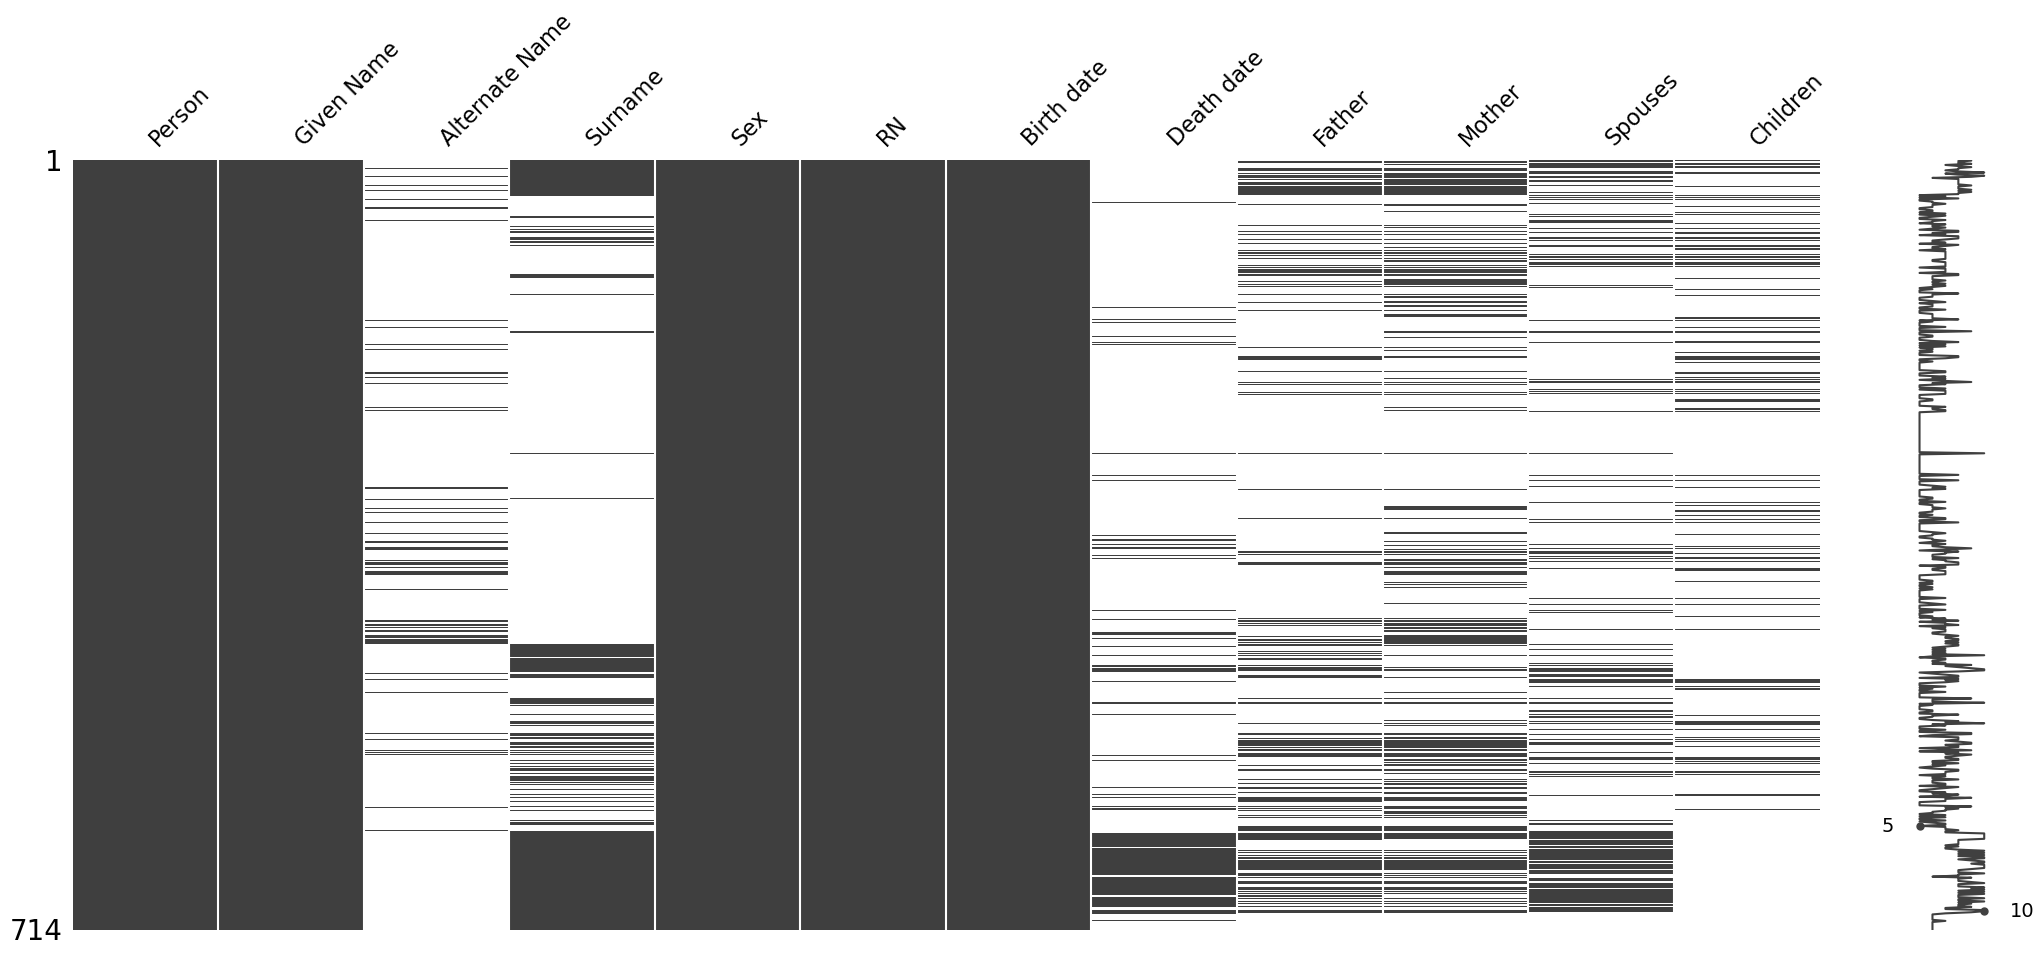

In [112]:
msno.matrix(Persons)

## Person Analytics

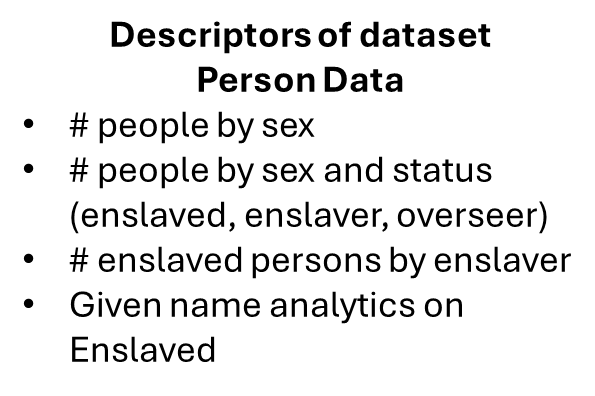

In [113]:
display.Image(filename="People.png", width=300, height=300)

### Total number of unique persons by sex

In [114]:
enslaved.groupby(['Sex'])['RN'].nunique().to_frame().reset_index()

,Sex,RN
0,?,12
1,F,281
2,M,421


### Total number of unique persons by status and sex

In [115]:
enslaved.groupby(['Status','Sex'])['RN'].nunique().to_frame().reset_index()

,Status,Sex,RN
0,Enslaved,?,12
1,Enslaved,F,253
2,Enslaved,M,312
3,Enslaver,F,28
4,Enslaver,M,62
5,Free,F,16
6,Free,M,17
7,Overseer,M,47


### Overseers in data set

In [116]:
names = enslaved[['RN','Given Name','Sex','Status']]
names = names.sort_values('Status').set_index('Status').loc['Overseer'].reset_index().drop(columns={'Status'})
names.groupby(['Sex'])['RN'].nunique()

Sex
M    47
Name: RN, dtype: int64

### Enslavers in data set

In [117]:
names = enslaved[['RN','Given Name','Sex','Status']]
names = names.sort_values('Status').set_index('Status').loc['Enslaver'].reset_index().drop(columns={'Status'})
names.groupby(['Sex'])['RN'].nunique()

Sex
F    28
M    62
Name: RN, dtype: int64

### Enslaved by enslaver

In [118]:
UHEnslaved = enslaved[['RN','Enslaver ID','Status']]
print(UHEnslaved.shape)
UHEnslaved = UHEnslaved.drop_duplicates()
print(UHEnslaved.shape)
UHEnslaved = UHEnslaved.sort_values('Status').set_index('Status').loc['Enslaved'].reset_index().drop(columns={'Status'})
UHEnslaved['Enslaver ID'] = UHEnslaved['Enslaver ID'].replace(regex=[r'\D+'], value=" ")
UHEnslaved = UHEnslaved.groupby(['Enslaver ID'])['RN'].nunique().to_frame().reset_index().rename(columns={'RN':'Number'}).sort_values('Number', ascending=False)
UHEnslaved.head(20)

(3174, 3)
(1154, 3)


,Enslaver ID,Number
39,43,164
41,45,137
40,44,118
31,272,78
3,1088,71
50,857,52
2,1065,37
37,283,34
34,280,28
30,271,27


### Enslaved by Enslaver by decade to Compare to census data

In [119]:
#make a copy for anlaytics
test = enslaved[['RN','Enslaver ID','Year']]
print(test.shape)
test= test.dropna(subset=['Year'])
test= test.dropna(subset=['Enslaver ID'])
test ['Year'] = test['Year'].round(-1)
test = test.drop_duplicates()
print(test.shape)
test.head(5)

(3174, 3)
(1381, 3)


,RN,Enslaver ID,Year
40,1167,PERS-CAB-1034-UH,1860.0
41,647,PERS-CAB-1034-UH,1860.0
43,1170,PERS-CAB-1034-UH,1860.0
44,1032,PERS-CAB-1034-UH,1860.0
45,661,PERS-CAB-1034-UH,1860.0


#### Narrow down to Union Hill Enslavers

In [120]:
test['Enslaver ID'] = test['Enslaver ID'].replace(regex=[r'\D+'], value=" ").astype(int)
Owners = [43,44,45,207,271,272,280,283,677,857,858,919,1034,1065,1088]
test = test[test['Enslaver ID'].isin(Owners)]
test.head()

,RN,Enslaver ID,Year
40,1167,1034,1860.0
41,647,1034,1860.0
43,1170,1034,1860.0
44,1032,1034,1860.0
45,661,1034,1860.0


### Narrow down to census years

In [121]:
test = test.groupby(['Year','Enslaver ID'])['RN'].nunique().to_frame().reset_index()
test = test.rename(columns={'Year':'Year','RN':'Persons'})
Census= [1780,1810,1820,1840,1850,1860]
test = test[test['Year'].isin(Census)].sort_values(['Year','Enslaver ID']).set_index(['Year','Enslaver ID'])
test

Persons
Year   Enslaver ID         
1780.0 43                72
       44                 6
       272                4
1810.0 44                20
       271               26
       272                3
1820.0 43                 1
       44                92
       45                12
       207               15
       272               73
       283                1
       1065               2
1840.0 45                18
       280               28
       283               34
       677                2
       1034               2
       1065              26
1850.0 45               116
       857               17
       1088              79
1860.0 45                91
       677                1
       857               57
       858               24
       919                3
       1034              21

### Number of mean places per Enslaved person

In [122]:
# of places lived per person across all data
places  = enslaved[['RN','Event ID','Status','Place']]
places= places.sort_values('Status').set_index('Status').loc['Enslaved'].reset_index().drop(columns={'Status'}).drop_duplicates()
places.groupby(['RN'])['Place'].nunique().mean()

1.5771230502599654

### number of enslaved living at more than 3 locations

In [123]:
df = places.groupby(['RN'])['Place'].nunique().to_frame().reset_index().sort_values('Place').set_index('Place').loc[3:].reset_index()
print(df.shape)
df.head()

(74, 2)


,Place,RN
0,3,899
1,3,138
2,3,135
3,3,895
4,3,901


### Enslaved Given Name Analytics

In [124]:
names = enslaved[['RN','Given Name','Sex','Status']]
names = names.sort_values('Status').set_index('Status').loc['Enslaved'].reset_index().drop(columns={'Status'})
names.groupby(['Sex'])['RN'].nunique()


Sex
?     12
F    253
M    312
Name: RN, dtype: int64

In [125]:
names.groupby(['Given Name'])['RN'].nunique().sort_values(ascending=False).head(10)


Given Name
Unknown     33
John        11
Nancy       11
Henry        9
Sam          8
Mary         8
Margaret     7
George       7
James        6
Betty        6
Name: RN, dtype: int64

In [126]:
names = names.groupby(['Sex','Given Name'])['RN'].nunique().to_frame().reset_index()
names = names.sort_values(['Sex','RN'],ascending=False)
print(names.shape)
names.head(10)

(299, 3)


,Sex,Given Name,RN
289,M,Unknown,19
224,M,John,11
209,M,Henry,9
265,M,Sam,8
202,M,George,7
214,M,James,6
225,M,Jordan,6
293,M,Will,6
151,M,Andrew,5
173,M,Charles,5


In [127]:
names[names['Sex']=='M']

,Sex,Given Name,RN
289,M,Unknown,19
224,M,John,11
209,M,Henry,9
265,M,Sam,8
202,M,George,7
214,M,James,6
225,M,Jordan,6
293,M,Will,6
151,M,Andrew,5
173,M,Charles,5


In [128]:
names[names['Sex']=='F']

,Sex,Given Name,RN
106,F,Nancy,11
140,F,Unknown,9
98,F,Mary,8
94,F,Margaret,7
26,F,Betty,6
58,F,Fanny,6
91,F,Lucy,5
97,F,Martha,5
120,F,Polly,5
17,F,Amy,4


In [129]:
names[names['Sex']=='?'].head(12)

,Sex,Given Name,RN
6,?,Unknown,5
0,?,Affea,1
1,?,Beass,1
2,?,Coy,1
3,?,Cutty,1
4,?,Mead,1
5,?,Sabrey,1
7,?,Vius,1


In [130]:
surnames = enslaved[['RN','Surname','Status']]
surnames = surnames.sort_values('Status').set_index('Status').loc['Enslaved'].reset_index().drop(columns={'Status'})
surnames = surnames.groupby(['Surname'])['RN'].nunique().to_frame().reset_index().sort_values('RN', ascending=False)
surnames.head(25)

,Surname,RN
11,Hatcher,16
1,Banks,11
10,Hartgrove,9
3,Bolling,8
19,Rose,5
23,Trotter,4
18,Madison,4
24,Winslow,3
25,Woodson,2
22,Spencer,2


## Event Analytics

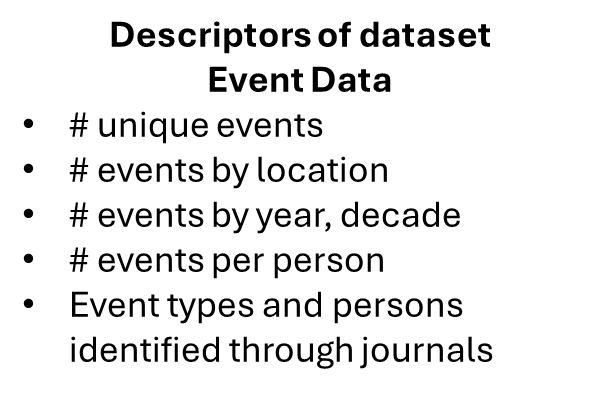

In [131]:
display.Image(filename="Events.png", width=400, height=400)

### Number of unique events

In [132]:
enslaved['Event ID'].nunique()

607

### Total number of events by place

In [133]:
enslaved.groupby(['Place'])['Event ID'].nunique().to_frame().reset_index().sort_values('Event ID',ascending=False).head(15)

,Place,Event ID
36,Union Hill,276
9,Colleton,90
28,Norwood,85
35,Soldier's Joy,49
37,Unknown,19
24,Montezuma,17
3,Benvenue,13
20,"Lovingston, Nelson, Virginia",10
13,Glenmore,6
39,"Williamsburg, Virginia",4


### Total number of events by year

In [134]:
enslaved.groupby(['Year'])['Event ID'].nunique().to_frame().reset_index().sort_values('Event ID',ascending=False).head(15)

,Year,Event ID
70,1857.0,54
71,1858.0,39
66,1853.0,27
72,1859.0,27
73,1860.0,24
59,1846.0,23
17,1787.0,19
11,1781.0,18
25,1795.0,17
21,1791.0,17


### Number of events per person - People with more than 10 events

In [135]:
enslaved.groupby(['RN'])['Event ID'].nunique().to_frame().reset_index().sort_values('Event ID',ascending=False).head(10)

,RN,Event ID
547,8,29
203,177,23
308,297,22
598,850,22
162,136,21
667,936,20
523,751,20
474,689,19
570,821,19
223,196,19


### number of people in this dataset

In [136]:
enslaved['RN'].nunique()

714

### Number of enslaved with more than 10 events

In [137]:
df = enslaved.groupby(['RN'])['Event ID'].nunique().to_frame().reset_index().sort_values('Event ID').set_index('Event ID').loc[10:].reset_index()
print(df.shape)
      

(75, 2)


### Number of enslaved with just one event

In [138]:
df = enslaved.groupby(['RN'])['Event ID'].nunique().to_frame().reset_index().sort_values('Event ID').set_index('Event ID').loc[:1].reset_index()
print(df.shape)

(130, 2)


### Events per person average

In [139]:
enslaved.groupby(['RN'])['Event ID'].nunique().mean()

4.310924369747899

### Narrow down to enslavers who kept journals

In [140]:
UHevents = enslaved[['RN','Event Type','Event ID','Enslaver ID','Status']]
UHevents = UHevents.sort_values('Status').set_index('Status').loc['Enslaved'].reset_index().drop(columns={'Status'})

print(UHevents.shape)
UHevents.head()

(2976, 4)


,RN,Event Type,Event ID,Enslaver ID
0,241,Enslaved,EVE-ENS-005,PERS-CAB-44-UH
1,788,Transfer,EVE-TFR-021,PERS-CAB-45-UH
2,853,Hiring,EVE-HIR-010,PERS-CAB-45-UH
3,901,Hiring,EVE-HIR-010,PERS-CAB-45-UH
4,831,Hiring,EVE-HIR-006,PERS-CAB-45-UH


In [141]:
UHevents['Enslaver ID'] = UHevents['Enslaver ID'].replace(regex=[r'\D+'], value=" ").astype(int)
Owners = [43,44,45,207,857,858,1065,1088]
UHevents = UHevents[UHevents['Enslaver ID'].isin(Owners)]

print(UHevents.shape)
UHevents=UHevents.drop_duplicates()
print(UHevents.shape)

(2400, 4)
(2395, 4)


In [142]:
# combined different types of work
Work = ['Craft','Agriculture','Domestic','Hiring','Labor','Overseer Contract'] 
UHevents['Type'] = UHevents['Event Type']
UHevents['Type'] = UHevents['Type'].where(~UHevents['Type'].isin(Work),'Work')
UHevents.head()

,RN,Event Type,Event ID,Enslaver ID,Type
0,241,Enslaved,EVE-ENS-005,44,Enslaved
1,788,Transfer,EVE-TFR-021,45,Transfer
2,853,Hiring,EVE-HIR-010,45,Work
3,901,Hiring,EVE-HIR-010,45,Work
4,831,Hiring,EVE-HIR-006,45,Work


In [143]:
UHevents= UHevents.groupby(['Enslaver ID','Type'])['RN'].nunique().to_frame().reset_index()
UHevents.head()

,Enslaver ID,Type,RN
0,43,Advertisement,2
1,43,Birth,51
2,43,Crime,3
3,43,Death,14
4,43,Disappeared,4


In [144]:
UHevents = UHevents.pivot(index=['Enslaver ID'], columns='Type', values='RN').fillna(0)
UHevents =UHevents[['Birth', 'Death','Marriage','Residence','Work','Necessities','Illness','Tax','Transfer','Travel']]
UHevents

Type,Birth,Death,Marriage,Residence,Work,Necessities,Illness,Tax,Transfer,Travel
Enslaver ID,,,,,,,,,,
43,51.0,14.0,0.0,5.0,10.0,58.0,4.0,0.0,21.0,7.0
44,3.0,1.0,0.0,0.0,21.0,56.0,2.0,42.0,2.0,2.0
45,18.0,7.0,11.0,94.0,36.0,76.0,1.0,29.0,41.0,1.0
207,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
857,8.0,4.0,4.0,29.0,23.0,0.0,13.0,0.0,6.0,13.0
858,1.0,0.0,0.0,10.0,4.0,1.0,0.0,13.0,5.0,0.0
1065,4.0,0.0,4.0,0.0,22.0,6.0,2.0,0.0,0.0,0.0
1088,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,22.0,0.0


### Events by Decade

In [145]:
#make a copy for anlaytics
test = enslaved[['Person','Given Name','Alternate Name','Surname','Sex','RN','Birth date','Death date','Father','Mother','Spouses','Children','Event ID','Event Type','Place','Status','Enslaver ID','Date','Year']]
print(test.shape)
test= test.dropna(subset=['Date'])
print(test.shape)
test.head(5)

(3174, 19)
(3084, 19)


,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Spouses,Children,Event ID,Event Type,Place,Status,Enslaver ID,Date,Year
0,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,NaN,NaN,PERS-CAB-308-UH,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...,EVE-RES-032,Residence,"Washington, DC",Free,NaN,1866-11-24,1866.0
1,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,PERS-CAB-1028-UH,NaN,EVE-CEN-006,Census,"Lovingston, Nelson, Virginia",Free,NaN,1870-08-13,1870.0
2,PERS-CAB-804-UH,Fanny,NaN,Hatcher,F,804,1851-4-25,NaN,PERS-CAB-320-UH,PERS-CAB-299-UH,NaN,NaN,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,NaN,1870-09-08,1870.0
3,PERS-CAB-299-UH,Nancy,NaN,Black,F,299,abt 1827,NaN,NaN,NaN,PERS-CAB-320-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,NaN,1870-09-08,1870.0
4,PERS-CAB-320-UH,John,NaN,Hatcher,M,320,abt 1825,NaN,NaN,PERS-CAB-800-UH,PERS-CAB-299-UH,PERS-CAB-804-UH PERS-CAB-884-UH PERS-CAB-885-U...,EVE-CEN-001,Census,"Lovingston, Nelson, Virginia",Free,NaN,1870-09-08,1870.0


In [146]:
events = test.copy()
events ['Year'] = events ['Year'].round(-1)
events = events.groupby(['Year'])['Event ID'].nunique().to_frame().reset_index()
events = events.rename(columns={'Year':'Year','Event ID':'Events'}).set_index('Year')
events

,Events
Year,
1770.0,23
1780.0,82
1790.0,96
1800.0,37
1810.0,7
1820.0,47
1830.0,25
1840.0,30
1850.0,93


Text(0.5, 0, 'Year')

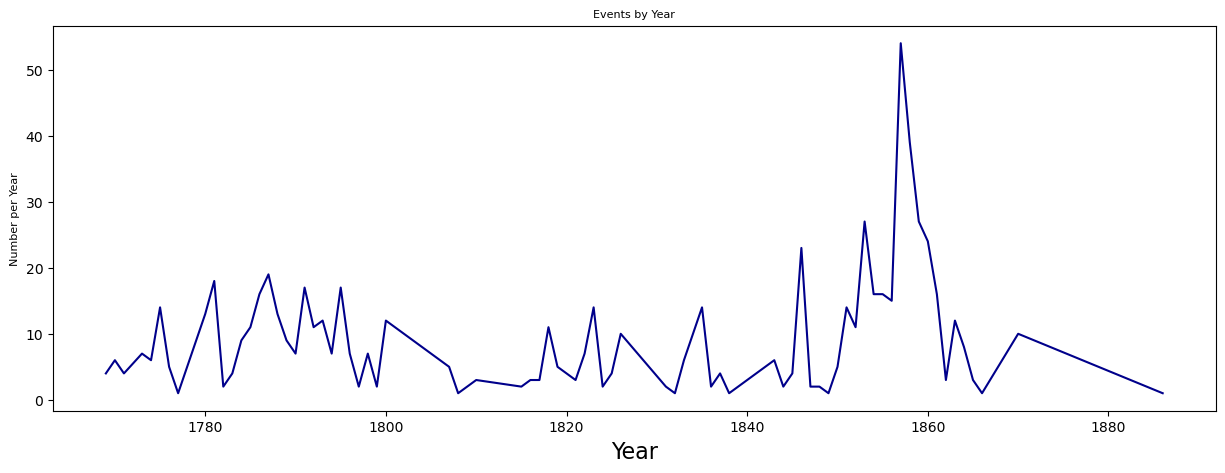

In [147]:
events = test.copy()
events = events.groupby(['Year'])['Event ID'].nunique().to_frame().reset_index()
events = events.rename(columns={'Year':'Year','Event ID':'Events'}).set_index('Year')

fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111)

ax1.plot(events['Events'],color='darkblue')
plt.title('Events by Year', fontsize=8)
plt.ylabel('Number per Year', fontsize=8)
plt.xlabel('Year', fontsize=16)
#plt.xticks(np.arange(1750, 1870, 20))
#plt.annotate('1862', (1862,90), fontsize=12)

# Final Steps 

## Save final file to CSV. Drop the 'Year' Column

In [148]:
enslaved = enslaved[['Person','Given Name','Alternate Name','Surname','Sex','RN','Birth date','Death date','Father','Mother','Spouses','Children','Event ID','Event Type','Place','lat','long','Status','Enslaver ID','Date','Description','Overseers','Source Description','Page','Repository']]
enslaved.head(2)

,Person,Given Name,Alternate Name,Surname,Sex,RN,Birth date,Death date,Father,Mother,Spouses,Children,Event ID,Event Type,Place,lat,long,Status,Enslaver ID,Date,Description,Overseers,Source Description,Page,Repository
0,PERS-CAB-948-UH,Beverly,NaN,Hartgrove,M,948,bef 1820,NaN,NaN,NaN,PERS-CAB-308-UH,PERS-CAB-788-UH PERS-CAB-791-UH PERS-CAB-794-U...,EVE-RES-032,Residence,"Washington, DC",38.906445,-77.036548,Free,NaN,1866-11-24,"Opened Bank account in Washington, D.C Account...",NaN,Records of the Field Offices for the State of ...,NaN,Ancestry.com (http://ancestry.com)
1,PERS-CAB-849-UH,Simon,NaN,Early,M,849,bef 1835,NaN,PERS-CAB-196-UH,PERS-CAB-833-UH,PERS-CAB-1028-UH,NaN,EVE-CEN-006,Census,"Lovingston, Nelson, Virginia",37.761590,-78.866644,Free,NaN,1870-08-13,"Dwelling 964, Family1000 Early Family.Simon, J...",NaN,"Virginia, Lovingston, Nelson.1870 U.S. census....",376A,"Ancestry.com ( http://www.ancestry.com, 2009)"


# COMPLETE